# Cleaning Data

At this stage, it is important to clean the 100x100data. 

Several issues were highlighted throughout the process.

### # of Finishers
As part of the analysis, DUV and ITRA finishers time were downloaded to verify runner's status and, if lucky, finishing time. 

When comparing the scraped 100x100 data to DUV and ITRA, it came to light that sometimes, runners are marked as finished on 100x100trail, although they did not get a finishers status on ITRA or DUV. THis required cleaning. 

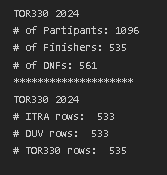

Furthermore, sometimes runners were given a status of not finished. THis was easily fixed by checking their timestamp at finish line (Courmayer). However, in that case, it was made sure that there was a timestamp for them between road sections

### Life bases / Refugees

Several cleaning methods were deployed to clean this column. There were 'RITIRIO' in some values, so this needed to be stripped and kept in a different column 

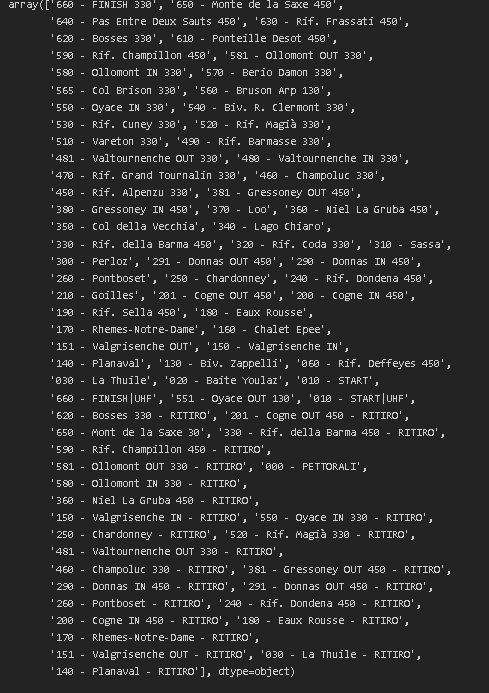


### 'Time' column
'Time' Column is one the most important columns in this process and needs to be meticulously cleaned for errors and inconsitencies!

The timesstamps had '+02:00' which was not necessary once inspected. 
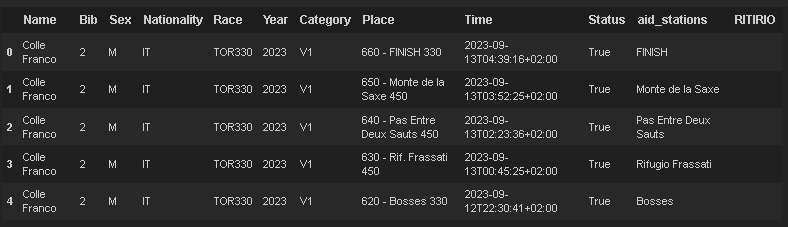


### Starting Time
Starting Times were also inaccurate. The starting time was set random times (who knows why?) but the times were changed to reflect wave start times!
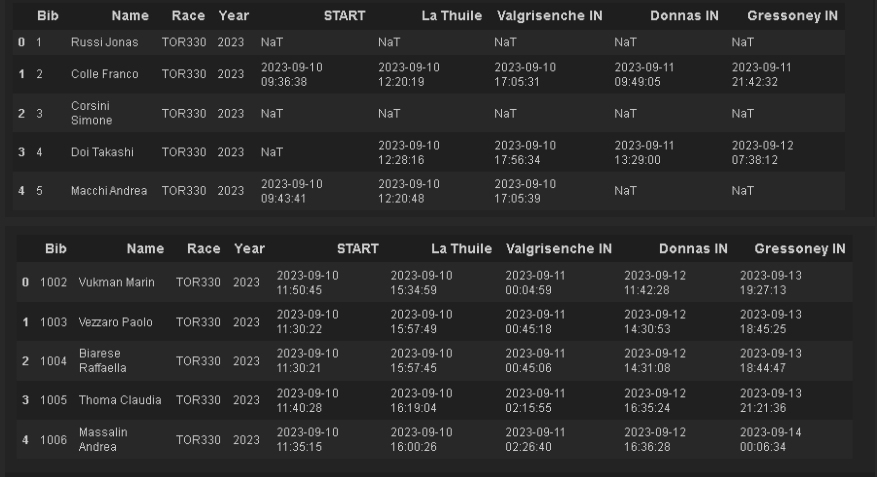

To deal with the Start Time, issue, DUV data was used to detect the start date for each year

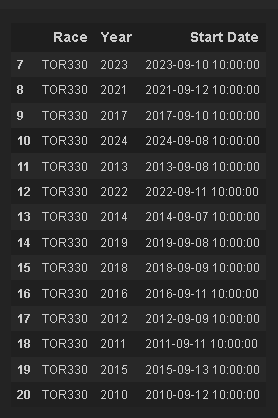

In [84]:
import re
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
### FIX BARMASSE
### FIX BARMA

In [86]:
# # Set pandas options to display all columns and rows
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

## Looping through scraped data from 100X100trail

In [87]:
races = ['TOR330'
#         ,'TOR450'
        ]
years = [ #'2021',
#         '2022',
#          '2023', 
    '2024'
        ]

TORX_df = {}

for race in races:
    for year in years:
        df = pd.read_excel(f'{race} Data/100x100trail/aid_station_{race}_{year}.xlsx',
                                 dtype={'Start Date': 'string',
                                        'Year': 'string'})
        print(f'{race}_{year} {df.shape}')
        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50),

TOR330_2024 (39181, 10)
**************************************************


In [88]:
TORX_df_concat = pd.concat(TORX_df)

In [89]:
TOR330 = TORX_df_concat[TORX_df_concat['Year'] == year]
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2024 0  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            1  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            2  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            3  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            4  D Haene Francois   10   M          FR  TOR330  2024      SEN   

                                        Place                       Time  \
TOR330_2024 0                660 - FINISH 330  2024-09-11T07:08:32+02:00   
            1      650 - Monte de la Saxe 450  2024-09-11T06:25:42+02:00   
            2  640 - Pas Entre Deux Sauts 450  2024-09-11T05:01:52+02:00   
            3         630 - Rif. Frassati 450  2024-09-11T03:24:39+02:00   
            4                620 - Bosses 330  2024-09-11T00:52:13+02:00   

               Status  
TOR330_2024 0    True  
            1    True  
            2    True  
            3    True  
            4    True

In [90]:
def counting_finish_DNF_dataset(df):
    for year in years :
        for race in races:

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()))
                
                
                
                # Finishers
                print('# of Finishers:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  True)].unique()))
                # DNFs
                print('# of DNFs:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race) &
                                                        (df['Status'] ==  False)].unique()))
                print('*'*20)
            else:
                pass
            
counting_finish_DNF_dataset(TOR330)

TOR330 2024
# of Partipants: 1096
# of Finishers: 535
# of DNFs: 561
********************


In [91]:
def counting_groupby_dataset(df, column):
    for year in years :
        for race in races:
            
            df = df[['Name', 'Status', 'Year', 'Race']].drop_duplicates()

            if len(df['Name'][(df['Year'] == year) & (df['Race'] == race)].unique()) != 0:
                print(race , year)
                ## The data is currently stacked so every checkpoint has a unique row
                # using the unique function to count unique participants in the data
                print('# of Partipants:', len(df['Name'][(df['Year'] == year) &
                                                        (df['Race'] == race)].unique()), '\n')
                
                print(df.groupby([column])[column].count())
                print('*'*20)
            else:
                pass
counting_groupby_dataset(df,  'Status')

TOR330 2024
# of Partipants: 1096 

Status
False    561
True     535
Name: Status, dtype: int64
********************


### DUV and ITRA data


#### # of Finishers
As part of the analysis, DUV and ITRA finishers time were downloaded to verify runner's status and, if lucky, finishing time. 

When comparing the scraped 100x100 data to DUV and ITRA, it came to light that sometimes, runners are marked as finished on 100x100trail, although they did not get a finishers status on ITRA or DUV. THis required cleaning. 

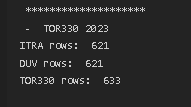


In [92]:
    TORX_duv_df = pd.read_excel(f'Database Data/TORX_duv_df.xlsx',
                                     dtype={'Start Date': 'string',
                                            'Year': 'string'})

    TORX_itra_no_DNF = pd.read_excel(f'Database Data/TORX_itra_no_DNF.xlsx',
                                     dtype={'Start Date': 'string',
                                           'Year': 'string'})

In [93]:
def find_out_the_rows_difference_between_datasets(df):
    for year in years :
        for race in races:
            if len(df['Name'][(df['Year'] == year)]) != 0:

                print(race, year)
                print('# ITRA rows: ', TORX_itra_no_DNF[(TORX_itra_no_DNF['Year'] == year) &
                                  (TORX_itra_no_DNF['Race'] == race)].shape[0])
                print('# DUV rows: ',TORX_duv_df[(TORX_duv_df['Year'] == year) &
                                  (TORX_duv_df['Race'] == race)].shape[0])

                print('# TOR330 rows: ', len(df['Name'][(df['Year'] == year) &
                                                 (df['Race'] == race) &
                                                 (df['Status'] == True)].unique()))
                print('\n', '*'*20)
                
                if year == '2022':
                    print(' - ','TOR330','2022')
                    print(TORX_itra_no_DNF[(TORX_itra_no_DNF['Race'] == 'TOR330') &
                          (TORX_itra_no_DNF['Year'] == '2022')].groupby(['Status'])['Status'].count())
                    print('\n', '*'*20)
            else: 
                pass

In [94]:
counting_finish_DNF_dataset(TOR330)
find_out_the_rows_difference_between_datasets(TOR330)
counting_groupby_dataset(TOR330,  'Status')

TOR330 2024
# of Partipants: 1096
# of Finishers: 535
# of DNFs: 561
********************
TOR330 2024
# ITRA rows:  533
# DUV rows:  533
# TOR330 rows:  535

 ********************
TOR330 2024
# of Partipants: 1096 

Status
False    561
True     535
Name: Status, dtype: int64
********************


### Cleaning Place column

In [95]:
TOR330['Place'].unique()

array(['660 - FINISH 330', '650 - Monte de la Saxe 450',
       '640 - Pas Entre Deux Sauts 450', '630 - Rif. Frassati 450',
       '620 - Bosses 330', '610 - Ponteille Desot 450',
       '590 - Rif. Champillon 450', '581 - Ollomont OUT 330',
       '580 - Ollomont IN 330', '570 - Berio Damon 330',
       '565 - Col Brison 330', '560 - Bruson Arp 130',
       '550 - Oyace IN 330', '540 - Biv. R. Clermont 330',
       '530 - Rif. Cuney 330', '520 - Rif. Magià 330',
       '510 - Vareton 330', '490 - Rif. Barmasse 330',
       '481 - Valtournenche OUT 330', '480 - Valtournenche IN 330',
       '470 - Rif. Grand Tournalin 330', '460 - Champoluc 330',
       '450 - Rif. Alpenzu 330', '381 - Gressoney OUT 450',
       '380 - Gressoney IN 450', '370 - Loo', '360 - Niel La Gruba 450',
       '350 - Col della Vecchia', '340 - Lago Chiaro',
       '330 - Rif. della Barma 450', '320 - Rif. Coda 330', '310 - Sassa',
       '300 - Perloz', '291 - Donnas OUT 450', '290 - Donnas IN 450',
       '260

In [96]:
# 030 - La Thuile - RITIRO
TOR330['aid_stations'] = TOR330['Place'].str.split(r'^\d+ - ').str.get(-1)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Balma')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace(r'\d+', '', regex=True)
TOR330['aid_stations'] = TOR330['aid_stations'].str.split('|').str.get(0)
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Niel - ','Niel ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Oyace IN','Oyace')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('  ',' ')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Mont de la Saxe','Monte de la Saxe')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rifugio della Barmasse', 'Rifugio Barmasse')
TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Promoud','Bivacco Zappelli')
TOR330['aid_stations'] = TOR330['aid_stations'].str.strip()
TOR330['RITIRIO'] = np.where(
    TOR330['aid_stations'].str.contains('RITIRO', na=False), 
    TOR330['aid_stations'],  '')
# TOR330['RITIRIO] =TOR330['RITIRIO].str.replace('- RITIRO', '')
TOR330['aid_stations'] = TOR330['aid_stations'].str.split(' - RITIRO').str.get(0)
print(', '.join(list(TOR330['aid_stations'].unique())))


C:\Users\Karina\AppData\Local\Temp\ipykernel_19864\986193751.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif. della Balm 450a','Rif. della Balma')
C:\Users\Karina\AppData\Local\Temp\ipykernel_19864\986193751.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Rif.', 'Rifugio')
C:\Users\Karina\AppData\Local\Temp\ipykernel_19864\986193751.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  TOR330['aid_stations'] = TOR330['aid_stations'].str.replace('Biv.','Bivacco')


FINISH, Monte de la Saxe, Pas Entre Deux Sauts, Rifugio Frassati, Bosses, Ponteille Desot, Rifugio Champillon, Ollomont OUT, Ollomont IN, Berio Damon, Col Brison, Bruson Arp, Oyace, Bivacco R. Clermont, Rifugio Cuney, Rifugio Magià, Vareton, Rifugio Barmasse, Valtournenche OUT, Valtournenche IN, Rifugio Grand Tournalin, Champoluc, Rifugio Alpenzu, Gressoney OUT, Gressoney IN, Loo, Niel La Gruba, Col della Vecchia, Lago Chiaro, Rifugio della Barma, Rifugio Coda, Sassa, Perloz, Donnas OUT, Donnas IN, Pontboset, Chardonney, Rifugio Dondena, Goilles, Cogne OUT, Cogne IN, Rifugio Sella, Eaux Rousse, Rhemes-Notre-Dame, Chalet Epee, Valgrisenche OUT, Valgrisenche IN, Planaval, Bivacco Zappelli, Rifugio Deffeyes, La Thuile, Baite Youlaz, START, Oyace OUT, PETTORALI


In [97]:
# copy the column to make a new column
for i in list(TOR330['RITIRIO'].unique()):
    print(i)


Bosses - RITIRO
Cogne OUT - RITIRO
Rifugio della Barma - RITIRO
Rifugio Champillon - RITIRO
Ollomont OUT - RITIRO
Ollomont IN - RITIRO
Niel La Gruba - RITIRO
Valgrisenche IN - RITIRO
Oyace - RITIRO
Chardonney - RITIRO
Rifugio Magià - RITIRO
Valtournenche OUT - RITIRO
Champoluc - RITIRO
Gressoney OUT - RITIRO
Donnas IN - RITIRO
Donnas OUT - RITIRO
Pontboset - RITIRO
Rifugio Dondena - RITIRO
Cogne IN - RITIRO
Eaux Rousse - RITIRO
Rhemes-Notre-Dame - RITIRO
Valgrisenche OUT - RITIRO
La Thuile - RITIRO
Planaval - RITIRO


In [98]:
TOR330[~(TOR330['RITIRIO'].isnull())]

Name   Bib Sex Nationality    Race  Year  \
TOR330_2024 0         D Haene Francois    10   M          FR  TOR330  2024   
            1         D Haene Francois    10   M          FR  TOR330  2024   
            2         D Haene Francois    10   M          FR  TOR330  2024   
            3         D Haene Francois    10   M          FR  TOR330  2024   
            4         D Haene Francois    10   M          FR  TOR330  2024   
...                                ...   ...  ..         ...     ...   ...   
            39176  Marziano Gianfranco  1413   M          IT  TOR330  2024   
            39177    Mcconaughy Joseph    11   M          US  TOR330  2024   
            39178        Lehmann Anita   592   F          CH  TOR330  2024   
            39179       Locci Philippe   221   M          FR  TOR330  2024   
            39180       Doutte Antoine   463   M          RE  TOR330  2024   

                  Category                           Place  \
TOR330_2024 0          SEN                660 - FINISH 330   
            1          SEN      650 - Monte de la Saxe 450   
            2          SEN  640 - Pas Entre Deux Sauts 450   
            3          SEN         630 - Rif. Frassati 450   
            4          SEN                620 - Bosses 330   
...                    ...                             ...   
            39176       V2                     010 - START   
            39177      SEN                     010 - START   
            39178       V1                     010 - START   
            39179       V2                     010 - START   
            39180       V1                     010 - START   

                                        Time  Status          aid_stations  \
TOR330_2024 0      2024-09-11T07:08:32+02:00    True                FINISH   
            1      2024-09-11T06:25:42+02:00    True      Monte de la Saxe   
            2      2024-09-11T05:01:52+02:00    True  Pas Entre Deux Sauts   
            3      2024-09-11T03:24:39+02:00    True      Rifugio Frassati   
            4      2024-09-11T00:52:13+02:00    True                Bosses   
...                                      ...     ...                   ...   
            39176  2024-09-08T11:38:34+02:00   False                 START   
            39177  2024-09-08T07:23:00+02:00   False                 START   
            39178  2024-09-08T07:23:00+02:00   False                 START   
            39179  2024-09-08T09:18:17+02:00   False                 START   
            39180  2024-09-08T09:25:26+02:00   False                 START   

                  RITIRIO  
TOR330_2024 0              
            1              
            2              
            3              
            4              
...                   ...  
            39176          
            39177          
            39178          
            39179          
            39180          

[39181 rows x 12 columns]

### Cleaning Time column

Column '2024-09-11T07:08:32+02:00' needs to be fixed into '2024-09-11 07:08:32' and turned into the datetime

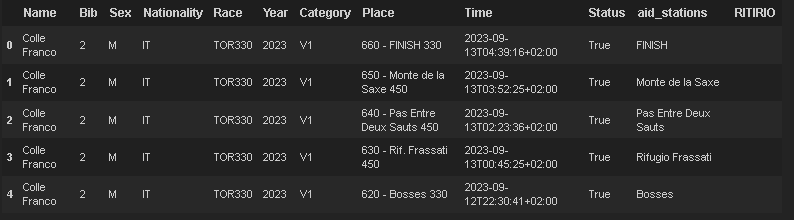

In [99]:
# 2024-09-11T07:08:32+02:00

# Split the 'Time' column to remove the timezone offset
TOR330['new_Time'] = TOR330['Time'].str.split('+').str[0]

# Convert the cleaned time string to a datetime object
TOR330['new_Time'] = pd.to_datetime(TOR330['new_Time'])

# # Add the 2-hour offset using timedelta
# # NO NEED!!!
# TOR330['new_Time'] = TOR330['new_Time'] + pd.to_timedelta('02:00:00')

# Preview the DataFrame
TOR330.head()

Name  Bib Sex Nationality    Race  Year Category  \
TOR330_2024 0  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            1  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            2  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            3  D Haene Francois   10   M          FR  TOR330  2024      SEN   
            4  D Haene Francois   10   M          FR  TOR330  2024      SEN   

                                        Place                       Time  \
TOR330_2024 0                660 - FINISH 330  2024-09-11T07:08:32+02:00   
            1      650 - Monte de la Saxe 450  2024-09-11T06:25:42+02:00   
            2  640 - Pas Entre Deux Sauts 450  2024-09-11T05:01:52+02:00   
            3         630 - Rif. Frassati 450  2024-09-11T03:24:39+02:00   
            4                620 - Bosses 330  2024-09-11T00:52:13+02:00   

               Status          aid_stations RITIRIO            new_Time  
TOR330_2024 0    True                FINISH         2024-09-11 07:08:32  
            1    True      Monte de la Saxe         2024-09-11 06:25:42  
            2    True  Pas Entre Deux Sauts         2024-09-11 05:01:52  
            3    True      Rifugio Frassati         2024-09-11 03:24:39  
            4    True                Bosses         2024-09-11 00:52:13

In [100]:
for i in TOR330.aid_stations.unique():
    print(i)

FINISH
Monte de la Saxe
Pas Entre Deux Sauts
Rifugio Frassati
Bosses
Ponteille Desot
Rifugio Champillon
Ollomont OUT
Ollomont IN
Berio Damon
Col Brison
Bruson Arp
Oyace
Bivacco R. Clermont
Rifugio Cuney
Rifugio Magià
Vareton
Rifugio Barmasse
Valtournenche OUT
Valtournenche IN
Rifugio Grand Tournalin
Champoluc
Rifugio Alpenzu
Gressoney OUT
Gressoney IN
Loo
Niel La Gruba
Col della Vecchia
Lago Chiaro
Rifugio della Barma
Rifugio Coda
Sassa
Perloz
Donnas OUT
Donnas IN
Pontboset
Chardonney
Rifugio Dondena
Goilles
Cogne OUT
Cogne IN
Rifugio Sella
Eaux Rousse
Rhemes-Notre-Dame
Chalet Epee
Valgrisenche OUT
Valgrisenche IN
Planaval
Bivacco Zappelli
Rifugio Deffeyes
La Thuile
Baite Youlaz
START
Oyace OUT
PETTORALI


### PIVOTING the Dataset

In [101]:
# Pivot the data so that each participant has its own column
pivoted_TOR330 = TOR330.pivot_table(
    index=['Name','Bib', 'Sex', 
           'Nationality', 'Category', 'Race','Year', 'Status' , #'RITIRIO'
          ],
    columns='aid_stations',  
    values='new_Time',
    aggfunc='first'  # Ensures only the first match is kept in case of duplicates
).reset_index()


# pivoted_TOR330 = pivoted_TOR330.sort_values(by = 'Bib', ascending = True)
pivoted_TOR330.head()

aid_stations                Name   Bib Sex Nationality Category    Race  Year  \
0                    Abe Hiroshi   374   M          JP       V1  TOR330  2024   
1                    Acerbi Luca  1275   M          IT       V3  TOR330  2024   
2             Adamczyk Guillaume  1376   M          BE       V2  TOR330  2024   
3                    Ade Gregory   366   M          FR       V2  TOR330  2024   
4                   Adrian Scott  1266   M          GB       V2  TOR330  2024   

aid_stations  Status        Baite Youlaz         Berio Damon  ...  \
0              False 2024-09-08 13:03:31                 NaT  ...   
1              False 2024-09-08 15:17:04                 NaT  ...   
2              False 2024-09-08 15:52:36                 NaT  ...   
3               True 2024-09-08 13:08:04 2024-09-12 19:37:42  ...   
4              False 2024-09-08 14:24:13                 NaT  ...   

aid_stations       Rifugio Magià       Rifugio Sella Rifugio della Barma  \
0                            NaT 2024-09-09 22:34:45 2024-09-11 10:57:38   
1                            NaT                 NaT                 NaT   
2                            NaT                 NaT                 NaT   
3            2024-09-12 08:42:21 2024-09-09 14:59:54 2024-09-10 21:03:34   
4                            NaT 2024-09-09 15:59:38 2024-09-11 03:10:04   

aid_stations               START               Sassa     Valgrisenche IN  \
0            2024-09-08 09:24:25 2024-09-11 04:02:41 2024-09-09 00:43:19   
1            2024-09-08 11:37:12                 NaT 2024-09-09 04:40:58   
2            2024-09-08 11:44:44                 NaT 2024-09-09 06:50:49   
3            2024-09-08 09:21:44 2024-09-10 15:27:20 2024-09-08 22:07:34   
4            2024-09-08 11:19:38 2024-09-10 20:22:36 2024-09-08 23:55:07   

aid_stations    Valgrisenche OUT    Valtournenche IN   Valtournenche OUT  \
0            2024-09-09 04:15:35                 NaT                 NaT   
1                            NaT                 NaT                 NaT   
2            2024-09-09 08:45:53                 NaT                 NaT   
3            2024-09-09 00:04:03 2024-09-11 22:46:14 2024-09-12 02:16:37   
4            2024-09-09 00:45:48                 NaT                 NaT   

aid_stations             Vareton  
0                            NaT  
1                            NaT  
2                            NaT  
3            2024-09-12 05:27:10  
4                            NaT  

[5 rows x 63 columns]

In [102]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1095, 63)
Status
False    560
True     535
Name: Status, dtype: int64


In [103]:
# reordering columns 
pivoted_TOR330 = pivoted_TOR330[[
'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race','Category', 'Status', #'RITIRIO',  
'START', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    # 'Bivacco Zappelli', 'Col Brison', 'Berio Damon' # Dropping these because its not very useful anyway!
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee', 'Rhemes-Notre-Dame',
    'Eaux Rousse', 'Rifugio Sella', 'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 
    'Chardonney', 'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia', 'Niel La Gruba', 'Loo',
    'Gressoney IN', 'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 
    'Oyace', 'Bruson Arp',   'Ollomont IN', 
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 
    'Pas Entre Deux Sauts', 'Monte de la Saxe', 'FINISH']]

pivoted_TOR330 = pivoted_TOR330.sort_values(by = 'Bib', ascending = True)
pivoted_TOR330.head()

aid_stations              Name  Bib Sex Nationality  Year    Race Category  \
218               Colle Franco    1   M          IT  2024  TOR330       V1   
1015            Verjee Sabrina    2   F          GB  2024  TOR330       V1   
829             Reynolds Galen    3   M          CA  2024  TOR330       V1   
119               Borzani Lisa    4   F          IT  2024  TOR330       V1   
353           Galeati Gianluca    5   M          IT  2024  TOR330       V1   

aid_stations  Status               START        Baite Youlaz  ...  \
218            False 2024-08-24 23:40:09                 NaT  ...   
1015            True 2024-08-24 23:41:09 2024-09-08 12:00:15  ...   
829            False 2024-09-08 09:00:00 2024-09-08 11:47:21  ...   
119             True 2024-09-08 09:00:00 2024-09-08 11:56:21  ...   
353            False 2024-09-08 09:00:00 2024-09-08 11:47:54  ...   

aid_stations          Bruson Arp         Ollomont IN        Ollomont OUT  \
218          2024-09-11 20:22:22                 NaT                 NaT   
1015         2024-09-11 07:47:36 2024-09-11 09:36:42 2024-09-11 09:41:25   
829                          NaT                 NaT                 NaT   
119          2024-09-11 11:26:56 2024-09-11 13:35:51 2024-09-11 14:01:57   
353                          NaT                 NaT                 NaT   

aid_stations  Rifugio Champillon     Ponteille Desot              Bosses  \
218                          NaT                 NaT                 NaT   
1015         2024-09-11 11:39:19 2024-09-11 13:21:27 2024-09-11 14:51:36   
829                          NaT                 NaT                 NaT   
119          2024-09-11 15:47:55 2024-09-11 17:51:55 2024-09-11 19:37:12   
353                          NaT                 NaT                 NaT   

aid_stations    Rifugio Frassati Pas Entre Deux Sauts    Monte de la Saxe  \
218                          NaT  2024-09-14 07:58:11                 NaT   
1015         2024-09-11 17:42:39  2024-09-11 19:33:31 2024-09-11 21:05:48   
829                          NaT                  NaT                 NaT   
119          2024-09-11 23:00:32  2024-09-12 02:16:14 2024-09-12 04:44:45   
353                          NaT                  NaT                 NaT   

aid_stations              FINISH  
218                          NaT  
1015         2024-09-11 22:03:21  
829                          NaT  
119          2024-09-12 06:09:34  
353                          NaT  

[5 rows x 58 columns]

In [104]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1095, 58)
Status
False    560
True     535
Name: Status, dtype: int64


### RITIRIO

Although every attempt was tried to include RITIRIO column in the dataset, it came to light that some people were twice marked retired. 

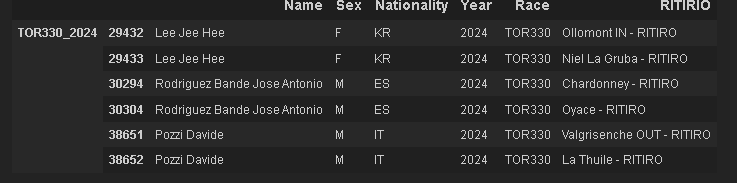

#### Solution
Do nothing. Dont reattach it to the pivoted dataset. It is useless anyway. Only 140 runners were marked as retired, very far from the DNF number.  

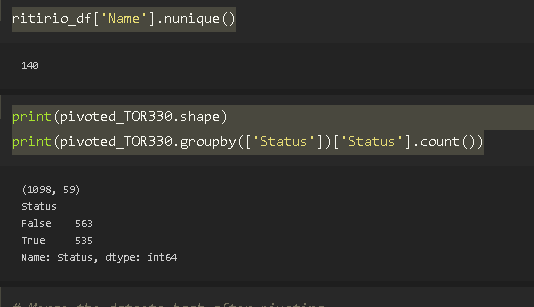

In [105]:
ritirio_df = TOR330[~(TOR330['RITIRIO'] == '')]
# ritirio_df = ritirio_df[['Bib', 'RITIRIO']]
ritirio_df.head()

Name   Bib Sex Nationality    Race  Year  \
TOR330_2024 8619   Hutchinson G Brian  1013   M          IE  TOR330  2024   
            9311         Cagna Andrea  1547   M          IT  TOR330  2024   
            28001       Park Kwangwon   150   M          KR  TOR330  2024   
            28262      Sotillo Antoni   232   M          ES  TOR330  2024   
            28556     Fioroni Massimo    62   M          IT  TOR330  2024   

                  Category                                Place  \
TOR330_2024 8619        V2            620 - Bosses 330 - RITIRO   
            9311        V1         201 - Cogne OUT 450 - RITIRO   
            28001       V1  330 - Rif. della Barma 450 - RITIRO   
            28262       V1            620 - Bosses 330 - RITIRO   
            28556       V2         201 - Cogne OUT 450 - RITIRO   

                                        Time  Status         aid_stations  \
TOR330_2024 8619   2024-09-13T06:21:34+02:00    True               Bosses   
            9311   2024-09-10T06:52:37+02:00    True            Cogne OUT   
            28001  2024-09-11T16:25:26+02:00   False  Rifugio della Barma   
            28262  2024-09-12T11:52:27+02:00   False               Bosses   
            28556  2024-09-10T01:52:27+02:00   False            Cogne OUT   

                                        RITIRIO            new_Time  
TOR330_2024 8619                Bosses - RITIRO 2024-09-13 06:21:34  
            9311             Cogne OUT - RITIRO 2024-09-10 06:52:37  
            28001  Rifugio della Barma - RITIRO 2024-09-11 16:25:26  
            28262               Bosses - RITIRO 2024-09-12 11:52:27  
            28556            Cogne OUT - RITIRO 2024-09-10 01:52:27

In [106]:
# Get a list of duplicate names
duplicate_list = ritirio_df['Name'][ritirio_df['Name'].duplicated()].unique()

# Filter the DataFrame to only rows where 'Name' is in the duplicate list
duplicates_in_dataframe = ritirio_df[ritirio_df['Name'].isin(duplicate_list)]

# Display or process the result
duplicates_in_dataframe[['Name', 'Sex', 'Nationality', 'Year', 'Race', 'RITIRIO' ]]


Name Sex Nationality  Year    Race  \
TOR330_2024 29432                   Lee Jee Hee   F          KR  2024  TOR330   
            29433                   Lee Jee Hee   F          KR  2024  TOR330   
            30294  Rodriguez Bande Jose Antonio   M          ES  2024  TOR330   
            30304  Rodriguez Bande Jose Antonio   M          ES  2024  TOR330   
            38651                  Pozzi Davide   M          IT  2024  TOR330   
            38652                  Pozzi Davide   M          IT  2024  TOR330   

                                     RITIRIO  
TOR330_2024 29432       Ollomont IN - RITIRO  
            29433     Niel La Gruba - RITIRO  
            30294        Chardonney - RITIRO  
            30304             Oyace - RITIRO  
            38651  Valgrisenche OUT - RITIRO  
            38652         La Thuile - RITIRO

In [107]:
ritirio_df['Name'].nunique()

140

In [108]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1095, 58)
Status
False    560
True     535
Name: Status, dtype: int64


In [109]:
# # Merge the datsets back after pivoting
# pivoted_TOR330 = pivoted_TOR330.merge(
#     ritirio_df[['Bib', 'RITIRIO']].drop_duplicates(),  # Ensure no duplicates in 'Bib' and 'RITIRIO'
#     on='Bib',
#     how='left'
# )

In [110]:
print(pivoted_TOR330.shape)
print(pivoted_TOR330.groupby(['Status'])['Status'].count())

(1095, 58)
Status
False    560
True     535
Name: Status, dtype: int64


### Dealing with Anomalies

Several anomalies were spotted with the finish times. 

Some runners had a timestamp at the finish line, yet failed to be scanned Ollomont IN or OUT or any other refugee or checkpoints on the last stage. 


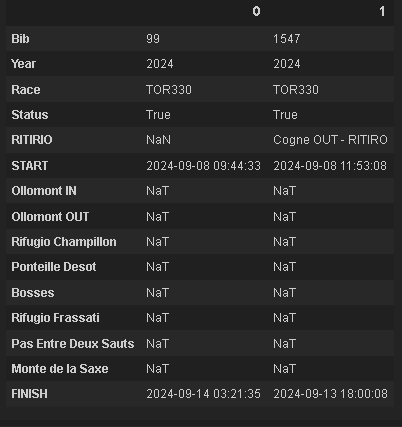

SOLUTION: change their status to FALSE and remove the timestamp

In [111]:
# Looking for runners who have FINISHED< BUT have missing values for all last 3 checkpoints!
anomalies_df = pivoted_TOR330[(pivoted_TOR330['Status'] == True) &
               (pivoted_TOR330['Bosses'].isna()) &                
               (pivoted_TOR330['Rifugio Frassati'].isna()) & 
               (pivoted_TOR330['Pas Entre Deux Sauts'].isna()) &
               (pivoted_TOR330['Monte de la Saxe'].isna())]

anomalies_df[[ 'Name', 'Bib', 'Year', 'Race', 'Status',  'START',
    	'Ollomont IN',	'Ollomont OUT',
    'Rifugio Champillon', 'Ponteille Desot',
    'Bosses',	'Rifugio Frassati',	'Pas Entre Deux Sauts',	'Monte de la Saxe',
    'FINISH'
    
    
]].reset_index(drop = True)

### Conclusion: Easily visible that there are several other places that have missing values 

aid_stations                            Name   Bib  Year    Race  Status  \
0             Martinez Raya Francisco Manuel    99  2024  TOR330    True   
1                               Cagna Andrea  1547  2024  TOR330    True   

aid_stations               START Ollomont IN Ollomont OUT Rifugio Champillon  \
0            2024-09-08 09:44:33         NaT          NaT                NaT   
1            2024-09-08 11:53:08         NaT          NaT                NaT   

aid_stations Ponteille Desot Bosses Rifugio Frassati Pas Entre Deux Sauts  \
0                        NaT    NaT              NaT                  NaT   
1                        NaT    NaT              NaT                  NaT   

aid_stations Monte de la Saxe              FINISH  
0                         NaT 2024-09-14 03:21:35  
1                         NaT 2024-09-13 18:00:08

In [112]:
# EXECUTING SOLUTION
for name in anomalies_df['Name'].unique():  

    # Fixing the code with .loc[] for proper assignment
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'FINISH'] = pd.NaT
    pivoted_TOR330.loc[pivoted_TOR330['Name'] == name, 'Status'] = False

In [113]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2024
# of Partipants: 1095
# of Finishers: 533
# of DNFs: 562
********************
TOR330 2024
# ITRA rows:  533
# DUV rows:  533
# TOR330 rows:  533

 ********************
TOR330 2024
# of Partipants: 1095 

Status
False    562
True     533
Name: Status, dtype: int64
********************


### Start Line Issues

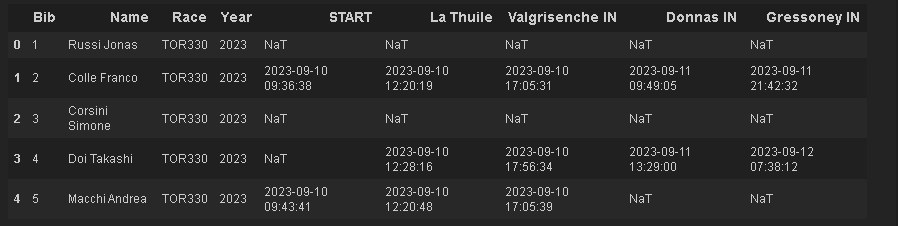

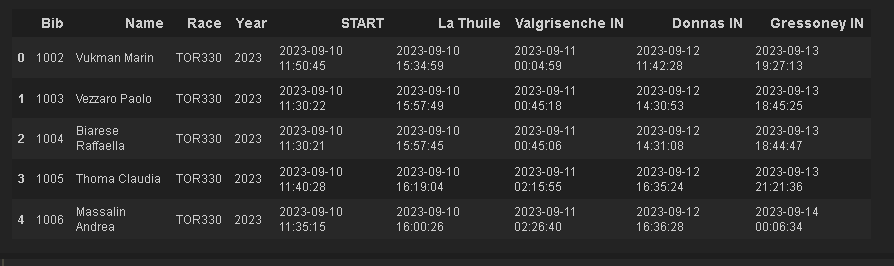

START times are all over the place and this is a MAJOR issue! 
It is important because if the start is not cleaned, it will affet the race finishing time and all the durations in between. 


#### SOLUTION
1) Made a new TIME column from DUV dates

2) added start times based on the wave (based on the bib)

##### Reading in TORX dates extracted from DUV

In [114]:
file = f'Database Data/TORX_duv_dates_df.xlsx'
dates_duv_df = pd.read_excel(file)

# Drop the intermediate columns if they're no longer needed
dates_duv_df = dates_duv_df.drop(columns=['Day_of_Week Start_Date'])    
dates_duv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Race        26 non-null     object        
 1   Year        26 non-null     int64         
 2   Start Date  26 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 752.0+ bytes


In [115]:
dates_duv_df[dates_duv_df['Race'] =='TOR330']

Race  Year          Start Date
7   TOR330  2023 2023-09-10 10:00:00
8   TOR330  2021 2021-09-12 10:00:00
9   TOR330  2017 2017-09-10 10:00:00
10  TOR330  2024 2024-09-08 10:00:00
11  TOR330  2013 2013-09-08 10:00:00
12  TOR330  2022 2022-09-11 10:00:00
13  TOR330  2014 2014-09-07 10:00:00
14  TOR330  2019 2019-09-08 10:00:00
15  TOR330  2018 2018-09-09 10:00:00
16  TOR330  2016 2016-09-11 10:00:00
17  TOR330  2012 2012-09-09 10:00:00
18  TOR330  2011 2011-09-11 10:00:00
19  TOR330  2015 2015-09-13 10:00:00
20  TOR330  2010 2010-09-12 10:00:00

### Adding dates into TOR330

In [116]:
# making sure both columns are years!
pivoted_TOR330['Year'] = pivoted_TOR330['Year'].astype('str')
dates_duv_df['Year'] = dates_duv_df['Year'].astype('str')

# have I dropped any rows?
print(pivoted_TOR330.shape)

# Merging on two columns: 'Race' and 'Year'
pivoted_TOR330_dates = pd.merge(pivoted_TOR330, dates_duv_df, on=['Race', 'Year'], how='inner')

# have I dropped any rows?
print(pivoted_TOR330_dates.shape)



(1095, 58)
(1095, 59)


In [117]:
# Following the assumption that every bib prior to 1001 starts at 10:00:00
pivoted_TOR330_dates['new_Start Date'] = np.where(
    pivoted_TOR330_dates['Bib'] < 1001, 
        pivoted_TOR330_dates['Start Date'], 
        pivoted_TOR330_dates['Start Date'] + pd.to_timedelta('02:00:00'))

# Following the assumption that every bib from 1001 onwards starts at 12:00:00
pivoted_TOR330_dates['Wave'] = np.where(
    pivoted_TOR330_dates['Bib'] <= 1001, 
        'Wave1', 
        'Wave2')

In [118]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']< 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

Bib              Name    Race  Year      new_Start Date  \
0    1      Colle Franco  TOR330  2024 2024-09-08 10:00:00   
1    2    Verjee Sabrina  TOR330  2024 2024-09-08 10:00:00   
2    3    Reynolds Galen  TOR330  2024 2024-09-08 10:00:00   
3    4      Borzani Lisa  TOR330  2024 2024-09-08 10:00:00   
4    5  Galeati Gianluca  TOR330  2024 2024-09-08 10:00:00   

            La Thuile     Valgrisenche IN           Donnas IN  \
0                 NaT                 NaT                 NaT   
1 2024-09-08 12:36:14 2024-09-08 18:06:48 2024-09-09 14:13:09   
2 2024-09-08 12:18:28 2024-09-08 17:12:09                 NaT   
3 2024-09-08 12:31:35 2024-09-08 18:06:56 2024-09-09 14:42:32   
4 2024-09-08 12:20:05 2024-09-08 17:28:38                 NaT   

         Gressoney IN  
0                 NaT  
1 2024-09-10 08:06:44  
2                 NaT  
3 2024-09-10 11:32:56  
4                 NaT

In [119]:
pivoted_TOR330_dates[['Bib','Name', 'Race', 'Year',  
                'new_Start Date', 'La Thuile', 'Valgrisenche IN',
                'Donnas IN', 'Gressoney IN']][pivoted_TOR330_dates['Bib']> 1001].sort_values(by = 'Bib', ascending = True).reset_index(drop = True).head()

Bib               Name    Race  Year      new_Start Date  \
0  1002     Rana Francesco  TOR330  2024 2024-09-08 12:00:00   
1  1003    Del Re Domenico  TOR330  2024 2024-09-08 12:00:00   
2  1004    Bellini Roberto  TOR330  2024 2024-09-08 12:00:00   
3  1005  Spagarino Stefano  TOR330  2024 2024-09-08 12:00:00   
4  1006  Pizzutti Riccardo  TOR330  2024 2024-09-08 12:00:00   

            La Thuile     Valgrisenche IN           Donnas IN  \
0 2024-09-08 16:13:08 2024-09-09 02:11:42 2024-09-10 18:25:37   
1 2024-09-08 16:09:10 2024-09-09 02:23:04                 NaT   
2 2024-09-08 15:10:33 2024-09-08 22:44:21 2024-09-10 04:51:31   
3 2024-09-08 16:09:08 2024-09-09 02:11:38 2024-09-10 20:02:44   
4                 NaT 2024-09-09 00:12:34 2024-09-10 11:35:15   

         Gressoney IN  
0 2024-09-11 22:24:03  
1                 NaT  
2 2024-09-11 08:49:09  
3 2024-09-12 00:27:15  
4 2024-09-11 12:18:11

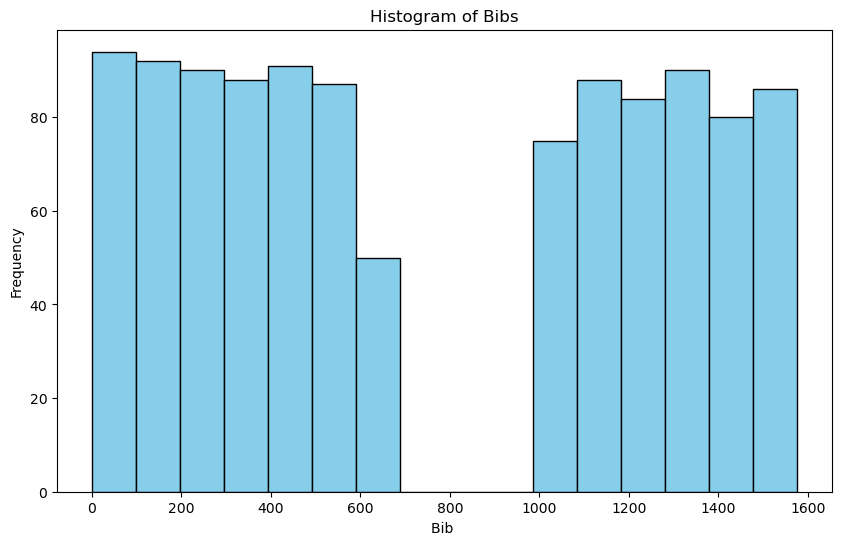

In [120]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(pivoted_TOR330_dates['Bib'], bins=16, color='skyblue', edgecolor='black')
plt.title(f'Histogram of Bibs')
plt.xlabel('Bib ')
plt.ylabel('Frequency')
plt.show()

In [121]:
### WHich wave is more likely to finish? 
### Wave 1 seems to have way more finishers - they do have a higher ITRA score, meaning that they are more
### experienced and stronger than Wave 2..
pivoted_TOR330_dates.groupby(['Wave', 'Status'])['Status'].size()

Wave   Status
Wave1  False     227
       True      366
Wave2  False     335
       True      167
Name: Status, dtype: int64

### Calculating Duration - THE MOST IMPORTANT!

In [122]:
# Calculate Duration
pivoted_TOR330_dates['Duration'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['new_Start Date'] 

# Sort the DataFrame by the 'Duration' column
pivoted_TOR330_dates = pivoted_TOR330_dates.sort_values(by='Duration')


Processing column: Duration
9    2 days 21:08:32
22   3 days 01:10:18
6    3 days 03:35:59
18   3 days 04:43:09
13   3 days 04:49:20
Name: Duration, dtype: timedelta64[ns]


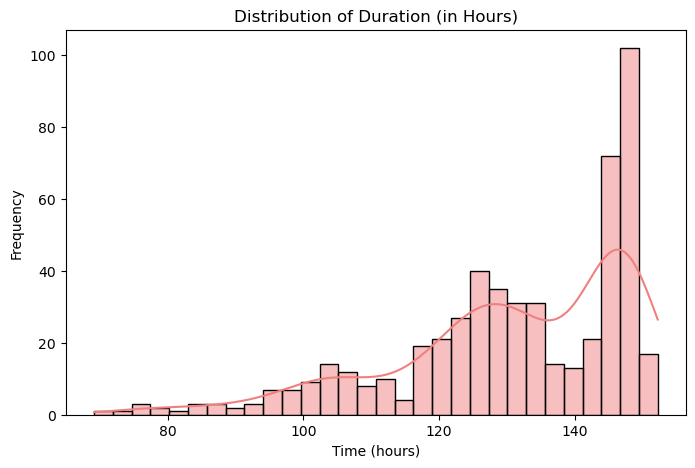

In [123]:
print(f"Processing column: Duration")
print(pivoted_TOR330_dates['Duration'].head())


pivoted_TOR330_dates['Duration']
# Convert to timedelta and get total hours (handling NaT)
pivoted_TOR330_dates['Duration_hours'] = pd.to_timedelta(
    pivoted_TOR330_dates['Duration'], errors='coerce'
).dt.total_seconds() / 3600  # Convert seconds to hours

# Drop NaN values for histogram visualization
data_to_plot = pivoted_TOR330_dates['Duration_hours'].dropna()

# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_to_plot, kde=True, bins=30, color="lightcoral")
plt.ticklabel_format(style='plain', axis='x')
plt.title(f"Distribution of Duration (in Hours)")
plt.xlabel("Time (hours)")
plt.ylabel("Frequency")
plt.show()


In [124]:
# Reorder the columns in the correct order
pivoted_TOR330_dates = pivoted_TOR330_dates[[
        'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 
        'Category', 'Status','Wave', 'Duration', # MOVING DURATION CLOSER TO THE START SO I CAN SEE IT!
        
        'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes',
         'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT',
        'Chalet Epee', 'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella',
        'Cogne IN', 'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney',
        'Pontboset', 'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa',
        'Rifugio Coda', 'Rifugio della Barma', 'Lago Chiaro',
        'Col della Vecchia', 'Niel La Gruba', 'Loo', 'Gressoney IN',
        'Gressoney OUT', 'Rifugio Alpenzu', 'Champoluc',
        'Rifugio Grand Tournalin', 'Valtournenche IN', 'Valtournenche OUT',
        'Rifugio Barmasse', 'Vareton', 'Rifugio Magià', 'Rifugio Cuney',
        'Bivacco R. Clermont', 'Oyace', 'Bruson Arp', 
         'Ollomont IN', 'Ollomont OUT', 'Rifugio Champillon',
        'Ponteille Desot', 'Bosses', 'Rifugio Frassati', 'Pas Entre Deux Sauts',
        'Monte de la Saxe', 'FINISH'
]]

### Checking accuracy of the Duration calculation

Because of issues with Start Date, it was thought that it would be a good idea to try and compare the DUV and ITRA duration time to establish accuracy of the calculation...

There are issues with the names, so some will be not be successfully merged.

In [125]:
# print(pivoted_TOR330_dates['Duration'][pivoted_TOR330_dates['Name'].str.contains('Jonina')])
# # print(TORX_duv_df['Performance'][TORX_duv_df['Name'].str.contains('Jonina')])
# # Finished in 144:46:43 hours and 

In [126]:
counting_finish_DNF_dataset(pivoted_TOR330)
find_out_the_rows_difference_between_datasets(pivoted_TOR330)
counting_groupby_dataset(pivoted_TOR330,  'Status')

TOR330 2024
# of Partipants: 1095
# of Finishers: 533
# of DNFs: 562
********************
TOR330 2024
# ITRA rows:  533
# DUV rows:  533
# TOR330 rows:  533

 ********************
TOR330 2024
# of Partipants: 1095 

Status
False    562
True     533
Name: Status, dtype: int64
********************


## extracting DNF and FInisher's for more cleaning!

In [127]:
pivoted_TOR330_dates_noDNF = pivoted_TOR330_dates[
                        # extracting runners whose status is True (Finished)
                        (pivoted_TOR330_dates['Status'] == True) &
                    ~(pivoted_TOR330_dates['FINISH'].isna())].reset_index()


In [128]:
pivoted_TOR330_dates_DNF = pivoted_TOR330_dates[
                    # selecting all rows that DNFed
                    (pivoted_TOR330_dates['Status'] == False) & # AND
                    # selecting all rows where FINISH does not have a time
                    (pivoted_TOR330_dates['FINISH'].isna())]

In [129]:
print(pivoted_TOR330_dates_noDNF.shape)
print(pivoted_TOR330_dates_DNF.shape)
print('MUST ADD UP TO:')
print(pivoted_TOR330_dates.shape)

(533, 61)
(562, 60)
MUST ADD UP TO:
(1095, 60)


### FINISHER'S Missing Timestamps
From time to time, timestamps are missing, even for finishers. Here is the missing values count for all finishers. 

THis is could be for several issues:
1) Participant's Fatigue - they forget to ask to be scanned

2) Volunteer's Fatigue - they forget to scan participants /  they thought they had already scanned the runer

3) Technology Failure - something goes wrong... ?
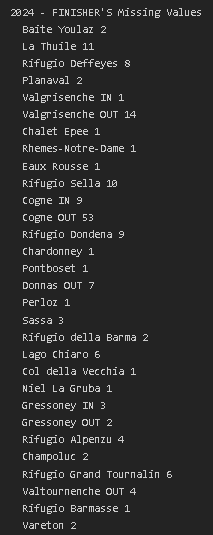

This is just a screenshot, more can be seen below!

In [130]:
print(f'{year} - FINISHER\'S Timestamp Missing Values')
for i in pivoted_TOR330_dates_noDNF.columns:
    missing_value_count =  pivoted_TOR330_dates_noDNF[i].isna().sum()
    
    if missing_value_count != 0:
        print(' ',i,missing_value_count)


2024 - FINISHER'S Timestamp Missing Values
  Baite Youlaz 2
  La Thuile 11
  Rifugio Deffeyes 8
  Planaval 2
  Valgrisenche IN 1
  Valgrisenche OUT 14
  Chalet Epee 1
  Rhemes-Notre-Dame 1
  Eaux Rousse 1
  Rifugio Sella 10
  Cogne IN 9
  Cogne OUT 53
  Rifugio Dondena 9
  Chardonney 1
  Pontboset 1
  Donnas OUT 7
  Perloz 1
  Sassa 3
  Rifugio della Barma 2
  Lago Chiaro 6
  Col della Vecchia 1
  Niel La Gruba 1
  Gressoney IN 3
  Gressoney OUT 2
  Rifugio Alpenzu 4
  Champoluc 2
  Rifugio Grand Tournalin 6
  Valtournenche OUT 4
  Rifugio Barmasse 1
  Vareton 2
  Rifugio Magià 1
  Rifugio Cuney 4
  Bivacco R. Clermont 5
  Oyace 1
  Bruson Arp 7
  Ollomont IN 5
  Ollomont OUT 24
  Rifugio Champillon 59
  Ponteille Desot 5
  Bosses 1
  Rifugio Frassati 1
  Pas Entre Deux Sauts 8
  Monte de la Saxe 4


### DNFs 

In [131]:
#### What missing values are there? 
### Some missing value is okay due to the fact that they DNFed so they wont have a timestamp
pivoted_TOR330_dates_DNF.isna().sum()

Name                         0
Bib                          0
Sex                          0
Nationality                  0
Year                         0
Race                         0
Category                     0
Status                       0
Wave                         0
Duration                   562
new_Start Date               0
Baite Youlaz                12
La Thuile                   21
Rifugio Deffeyes            30
Planaval                    37
Valgrisenche IN             59
Valgrisenche OUT            99
Chalet Epee                100
Rhemes-Notre-Dame          115
Eaux Rousse                157
Rifugio Sella              232
Cogne IN                   248
Cogne OUT                  261
Goilles                    278
Rifugio Dondena            288
Chardonney                 283
Pontboset                  290
Donnas IN                  291
Donnas OUT                 305
Perloz                     311
Sassa                      310
Rifugio Coda               315
Rifugio 

### What is the last place that DNFers reached?

In [132]:
# Function to find the last non-blank column
def get_last_non_blank(row):
    for col in reversed(row.index):
        if pd.notna(row[col]):  # Check if the value is not NaN
#             print(col)
            return col
#     return None  # In case all columns are blank

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)


In [133]:
pivoted_TOR330_dates = pivoted_TOR330_dates[['Name', 'Bib',
                                                     'Sex', 'Nationality',
                                                     'Year', 'Race', 
                                                     'Category', 'Status', 'Wave', 'Duration', 
                                                      'Retired', # putting retired at the from and not the back
                                                     'new_Start Date',
       'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
       'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
       'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
       'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
       'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
       'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
       'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
       'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
       'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
       'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
       'Bruson Arp',   'Ollomont IN',
       'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
       'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
       'FINISH']]

In [134]:
# creating a dataset to examine DNFs in the excel
pivoted_TOR330_dates_DNF_for_excel = pivoted_TOR330_dates_DNF.copy().drop(columns=['Sex', 'Nationality',
                                                          'Category', 'Status', 
                                                          'Wave', 'Duration'])    
# for year in years:
#     pivoted_TOR330_dates_DNF_for_excel.to_excel(f'TOR330 Data/DNF/DNF_df_{year}.xlsx', index = False)


In [135]:
pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == True].head(1)

Name  Bib Sex Nationality  Year    Race Category  Status  \
9  D Haene Francois   10   M          FR  2024  TOR330      SEN    True   

    Wave        Duration  ...          Bruson Arp         Ollomont IN  \
9  Wave1 2 days 21:08:32  ... 2024-09-10 18:48:52 2024-09-10 20:14:49   

         Ollomont OUT  Rifugio Champillon     Ponteille Desot  \
9 2024-09-10 20:33:07 2024-09-10 21:51:36 2024-09-10 23:27:47   

               Bosses    Rifugio Frassati Pas Entre Deux Sauts  \
9 2024-09-11 00:52:13 2024-09-11 03:24:39  2024-09-11 05:01:52   

     Monte de la Saxe              FINISH  
9 2024-09-11 06:25:42 2024-09-11 07:08:32  

[1 rows x 61 columns]

### Issues with Last location Detected
Some people who too far of a distance between last lifebase /  refuge / checkpoint for it to be an accurate representation of their last location. 

2023
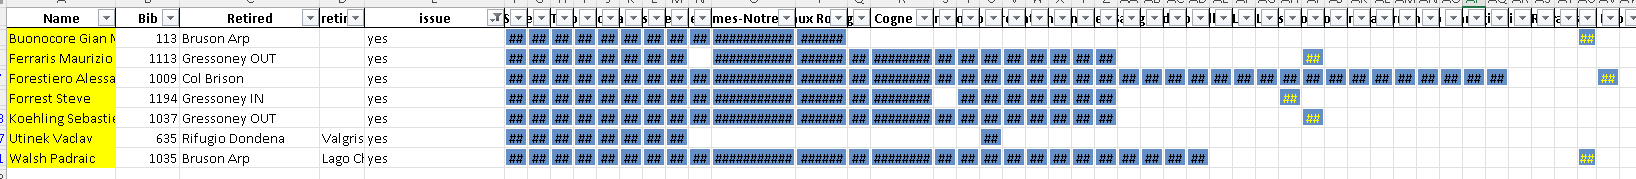

2024

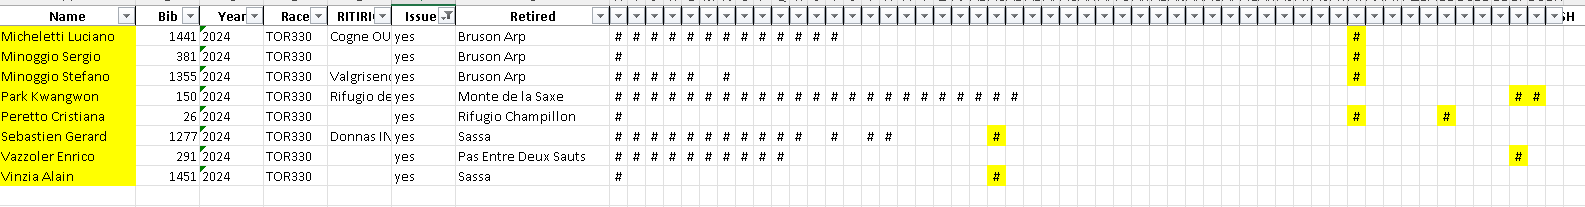

##### Solution
Create a loop that would clean those timestamps.

In [136]:
try:
    if year == '2023':

        names_that_DNFed_and_then_popped_up_miles_away =['Utinek Vaclav', 'Walsh Padraic',
                                                        'Ferraris Maurizio', 
    # 'Buonocore Gian Mario', 'Forestiero Alessandro', ## Have 2 timestamps of time travel
                                                         'Forrest Steve','Koehling Sebastien'
                                                        ]
        retired_list = list(pivoted_TOR330_dates['Retired'][
            pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())
        print(retired_list)

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            retired_column = row['Retired']  # Get the column name in 'Retired'


            if retired_column in retired_list:
                pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        # Prepending 'Name' and 'Bib' to the list
        retired_list = ['Name', 'Bib'] + retired_list  + ['Retired']
        print(retired_list)

    elif year == '2024':
        names_that_DNFed_and_then_popped_up_miles_away =['Micheletti Luciano', 'Minoggio Sergio','Minoggio Stefano', 
                                                        'Park Kwangwon',  ## Has 2 time teleportation 
                                                        'Peretto Cristiana', ## Has 2 time teleportation 
                                                        'Sebastien Gerard', 'Vazzoler Enrico', 'Vinzia Alain']

        for index, row in pivoted_TOR330_dates[pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].iterrows():
            # Get the column name in 'Retired'
            retired_column = row['Retired']

            retired_list = list(pivoted_TOR330_dates['Retired'][
                pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)].unique())

            if row['Name'] == 'Park Kwangwon':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Pas Entre Deux Sauts'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Monte de la Saxe'] = pd.NaT

            elif row['Name'] == 'Peretto Cristiana':
                # Has 2 cases of teletransportation
                pivoted_TOR330_dates.at[index, 'Rifugio Champillon'] = pd.NaT
                pivoted_TOR330_dates.at[index, 'Bruson Arp'] = pd.NaT

            else:

                if retired_column in retired_list:
                    pivoted_TOR330_dates.at[index, retired_column] = pd.NaT

        retired_list = ['Name', 'Bib'] + retired_list + ['Retired']
        print(retired_list)

     # Display the updated DataFrame
    pivoted_TOR330_dates[retired_list][pivoted_TOR330_dates['Name'].isin(names_that_DNFed_and_then_popped_up_miles_away)]

except:
    pass

['Name', 'Bib', 'Rifugio Champillon', 'Monte de la Saxe', 'Pas Entre Deux Sauts', 'Bruson Arp', 'Sassa', 'Retired']


In [137]:
# Dropping the column retired otherwise it is going to think that RETIRED is the last column
pivoted_TOR330_dates = pivoted_TOR330_dates.drop(columns=['Retired'])    

# # Apply the function to each row and assign the result to 'Retired'
pivoted_TOR330_dates['Retired'] = np.where(pivoted_TOR330_dates['Status'] == False, 
                                               pivoted_TOR330_dates.apply(get_last_non_blank, axis=1),
                                               np.nan)

In [138]:
pivoted_TOR330_dates.head()

Name  Bib Sex Nationality  Year    Race Category  Status  \
9    D Haene Francois   10   M          FR  2024  TOR330      SEN    True   
22  Marmissolle Benat   25   M          FR  2024  TOR330       V1    True   
6      Perrier Martin    7   M          CH  2024  TOR330      SEN    True   
18      Macchi Andrea   20   M          IT  2024  TOR330      SEN    True   
13        Hall Damian   15   M          GB  2024  TOR330       V1    True   

     Wave        Duration  ...         Ollomont IN        Ollomont OUT  \
9   Wave1 2 days 21:08:32  ... 2024-09-10 20:14:49 2024-09-10 20:33:07   
22  Wave1 3 days 01:10:18  ... 2024-09-10 23:02:43 2024-09-10 23:20:59   
6   Wave1 3 days 03:35:59  ... 2024-09-11 01:54:10 2024-09-11 02:02:45   
18  Wave1 3 days 04:43:09  ... 2024-09-11 02:42:57 2024-09-11 02:51:44   
13  Wave1 3 days 04:49:20  ... 2024-09-11 02:04:11 2024-09-11 02:29:34   

    Rifugio Champillon     Ponteille Desot              Bosses  \
9  2024-09-10 21:51:36 2024-09-10 23:27:47 2024-09-11 00:52:13   
22                 NaT 2024-09-11 02:57:39 2024-09-11 04:36:19   
6  2024-09-11 03:41:57 2024-09-11 05:19:30 2024-09-11 07:12:37   
18 2024-09-11 04:42:22 2024-09-11 06:32:27 2024-09-11 08:22:14   
13 2024-09-11 04:27:34 2024-09-11 06:32:06 2024-09-11 08:22:19   

      Rifugio Frassati Pas Entre Deux Sauts    Monte de la Saxe  \
9  2024-09-11 03:24:39  2024-09-11 05:01:52 2024-09-11 06:25:42   
22 2024-09-11 07:06:42  2024-09-11 08:45:41 2024-09-11 10:19:44   
6  2024-09-11 09:39:33  2024-09-11 11:26:28 2024-09-11 12:52:46   
18 2024-09-11 10:48:23  2024-09-11 12:25:23 2024-09-11 13:59:46   
13 2024-09-11 10:48:27  2024-09-11 12:25:38 2024-09-11 13:59:27   

                FINISH Retired  
9  2024-09-11 07:08:32     NaN  
22 2024-09-11 11:10:18     NaN  
6  2024-09-11 13:35:59     NaN  
18 2024-09-11 14:43:09     NaN  
13 2024-09-11 14:49:20     NaN  

[5 rows x 61 columns]

###  Unpredictable Weather of 2022 
In 2022, due to the weather,  the race directors decided to stop the race at Bosses and Refuge Frassati.  

In [139]:
pivoted_TOR330_dates['Status1'] = pivoted_TOR330_dates['Status'].astype('str')
# print(pivoted_TOR330_dates['Status1'].unique())

for year in years:
    if year == '2022':
        # Update 'Status1' for year 2022
        pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ] = pivoted_TOR330_dates.loc[
            pivoted_TOR330_dates['Year'] == year, 'Status1'
        ].str.replace('True', 'Finished')

        # For finishers at Bosses
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Bosses'), 'Status1'
        ].str.replace('False', 'Finished at Bosses')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Rifugio Frassati')

        # For finishers at Rifugio Frassati
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year) & (pivoted_TOR330_dates['Retired'] == 'Rifugio Frassati'), 'Status1'
        ].str.replace('False', 'Rifugio Frassati')

        
        
        # All other DNFs
        pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ] = pivoted_TOR330_dates.loc[
            (pivoted_TOR330_dates['Year'] == year)
            & ~(pivoted_TOR330_dates['Retired'].isin(['Bosses', 'Rifugio Frassati'])), 'Status1'
        ].str.replace('False', 'DNFs')
        
        
        
        
        
    else:
        
        print(year)
        # Update 'Status1' for years other than 2022
        pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1'] = (
            pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Year'] == year, 'Status1']
            .str.replace('True', 'Finished')
            .str.replace('False', 'DNF')
        )
        print(pivoted_TOR330_dates['Status1'].unique())


2024
['Finished' 'DNF']


In [140]:
pivoted_TOR330_dates['Status1'].unique()

array(['Finished', 'DNF'], dtype=object)

In [141]:
counting_finish_DNF_dataset(pivoted_TOR330_dates)
find_out_the_rows_difference_between_datasets(pivoted_TOR330_dates)
pivoted_TOR330_dates.groupby('Status1')['Status1'].count()

TOR330 2024
# of Partipants: 1095
# of Finishers: 533
# of DNFs: 562
********************
TOR330 2024
# ITRA rows:  533
# DUV rows:  533
# TOR330 rows:  533

 ********************


Status1
DNF         562
Finished    533
Name: Status1, dtype: int64

In [142]:
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows

### Where did the DNFs occur?

In [143]:
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' IN', '')
pivoted_TOR330_dates['Retired'] = pivoted_TOR330_dates['Retired'].str.replace(' OUT', '')

In [144]:
section1 = ['Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
             'Planaval', 'Valgrisenche']
section2 = [ 'Chalet Epee', 'Rhemes-Notre-Dame',
            'Eaux Rousse', 'Rifugio Sella', 'Cogne']

section3 = [ 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset', 'Donnas']
section4  = ['Perloz', 'Sassa', 'Rifugio Coda',
            'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
            'Niel La Gruba', 'Loo', 'Gressoney']

section5 = ['Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin', 'Valtournenche'] 

section6 = [ 'Vareton', 'Rifugio Barmasse',
            'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
            'Bruson Arp',   'Ollomont']
        
section7 = [ 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
            'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
            'FINISH']

# finding the low / high season by date
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section1), 'Retired_Section'] = 'Section 1'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section2), 'Retired_Section'] = 'Section 2'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section3), 'Retired_Section'] = 'Section 3'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section4), 'Retired_Section'] = 'Section 4'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section5), 'Retired_Section'] = 'Section 5'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section6), 'Retired_Section'] = 'Section 6'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'].isin(section7), 'Retired_Section'] = 'Section 7'
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Retired_Section'] = 'DNS'
pivoted_TOR330_dates[(pivoted_TOR330_dates['Retired'].isnull())]

Name   Bib Sex Nationality  Year    Race Category  \
9          D Haene Francois    10   M          FR  2024  TOR330      SEN   
22        Marmissolle Benat    25   M          FR  2024  TOR330       V1   
6            Perrier Martin     7   M          CH  2024  TOR330      SEN   
18            Macchi Andrea    20   M          IT  2024  TOR330      SEN   
13              Hall Damian    15   M          GB  2024  TOR330       V1   
...                     ...   ...  ..         ...   ...     ...      ...   
1001            Xi Hongpeng  1468   M          CN  2024  TOR330       V1   
990         Billi Francesca  1456   F          IT  2024  TOR330       V1   
826              Lu Sheming  1265   M          CN  2024  TOR330       V1   
805            Zhang Bochao  1242   M          CN  2024  TOR330       V1   
1049  Forestiero Alessandro  1524   M          IT  2024  TOR330       V1   

      Status   Wave        Duration  ...  Rifugio Champillon  \
9       True  Wave1 2 days 21:08:32  ... 2024-09-10 21:51:36   
22      True  Wave1 3 days 01:10:18  ...                 NaT   
6       True  Wave1 3 days 03:35:59  ... 2024-09-11 03:41:57   
18      True  Wave1 3 days 04:43:09  ... 2024-09-11 04:42:22   
13      True  Wave1 3 days 04:49:20  ... 2024-09-11 04:27:34   
...      ...    ...             ...  ...                 ...   
1001    True  Wave2 6 days 06:21:09  ... 2024-09-13 22:10:23   
990     True  Wave2 6 days 06:53:20  ... 2024-09-13 23:18:36   
826     True  Wave2 6 days 06:57:12  ... 2024-09-13 22:18:14   
805     True  Wave2 6 days 06:59:52  ...                 NaT   
1049    True  Wave2 6 days 08:14:00  ... 2024-09-13 23:25:33   

         Ponteille Desot              Bosses    Rifugio Frassati  \
9    2024-09-10 23:27:47 2024-09-11 00:52:13 2024-09-11 03:24:39   
22   2024-09-11 02:57:39 2024-09-11 04:36:19 2024-09-11 07:06:42   
6    2024-09-11 05:19:30 2024-09-11 07:12:37 2024-09-11 09:39:33   
18   2024-09-11 06:32:27 2024-09-11 08:22:14 2024-09-11 10:48:23   
13   2024-09-11 06:32:06 2024-09-11 08:22:19 2024-09-11 10:48:27   
...                  ...                 ...                 ...   
1001 2024-09-14 02:22:32 2024-09-14 05:34:53 2024-09-14 10:12:50   
990  2024-09-14 02:36:29 2024-09-14 06:28:02 2024-09-14 10:08:25   
826  2024-09-14 02:21:51 2024-09-14 06:24:49 2024-09-14 10:10:34   
805  2024-09-14 02:32:52 2024-09-14 06:28:25 2024-09-14 09:23:48   
1049 2024-09-14 04:04:56 2024-09-14 06:50:13 2024-09-14 11:03:02   

     Pas Entre Deux Sauts    Monte de la Saxe              FINISH Retired  \
9     2024-09-11 05:01:52 2024-09-11 06:25:42 2024-09-11 07:08:32     NaN   
22    2024-09-11 08:45:41 2024-09-11 10:19:44 2024-09-11 11:10:18     NaN   
6     2024-09-11 11:26:28 2024-09-11 12:52:46 2024-09-11 13:35:59     NaN   
18    2024-09-11 12:25:23 2024-09-11 13:59:46 2024-09-11 14:43:09     NaN   
13    2024-09-11 12:25:38 2024-09-11 13:59:27 2024-09-11 14:49:20     NaN   
...                   ...                 ...                 ...     ...   
1001  2024-09-14 13:47:22 2024-09-14 16:56:11 2024-09-14 18:21:09     NaN   
990   2024-09-14 13:46:28 2024-09-14 17:04:20 2024-09-14 18:53:20     NaN   
826   2024-09-14 13:43:47 2024-09-14 17:03:47 2024-09-14 18:57:12     NaN   
805   2024-09-14 13:53:26 2024-09-14 17:03:24 2024-09-14 18:59:52     NaN   
1049  2024-09-14 16:18:41 2024-09-14 19:06:03 2024-09-14 20:14:00     NaN   

       Status1 Retired_Section  
9     Finished             NaN  
22    Finished             NaN  
6     Finished             NaN  
18    Finished             NaN  
13    Finished             NaN  
...        ...             ...  
1001  Finished             NaN  
990   Finished             NaN  
826   Finished             NaN  
805   Finished             NaN  
1049  Finished             NaN  

[533 rows x 63 columns]

In [145]:
# making sure that I caught all aid stations!!!!
pivoted_TOR330_dates[
    (pivoted_TOR330_dates['Status'] == False) &
    
    (pivoted_TOR330_dates['Retired_Section'].isnull())
                    ]

Empty DataFrame
Columns: [Name, Bib, Sex, Nationality, Year, Race, Category, Status, Wave, Duration, new_Start Date, Baite Youlaz, La Thuile, Rifugio Deffeyes, Planaval, Valgrisenche IN, Valgrisenche OUT, Chalet Epee, Rhemes-Notre-Dame, Eaux Rousse, Rifugio Sella, Cogne IN, Cogne OUT, Goilles, Rifugio Dondena, Chardonney, Pontboset, Donnas IN, Donnas OUT, Perloz, Sassa, Rifugio Coda, Rifugio della Barma, Lago Chiaro, Col della Vecchia, Niel La Gruba, Loo, Gressoney IN, Gressoney OUT, Rifugio Alpenzu, Champoluc, Rifugio Grand Tournalin, Valtournenche IN, Valtournenche OUT, Rifugio Barmasse, Vareton, Rifugio Magià, Rifugio Cuney, Bivacco R. Clermont, Oyace, Bruson Arp, Ollomont IN, Ollomont OUT, Rifugio Champillon, Ponteille Desot, Bosses, Rifugio Frassati, Pas Entre Deux Sauts, Monte de la Saxe, FINISH, Retired, Status1, Retired_Section]
Index: []

[0 rows x 63 columns]

In [146]:
pivoted_TOR330_dates['Retired_Section'].unique()

array([nan, 'Section 7', 'Section 2', 'Section 3', 'Section 1', 'DNS',
       'Section 5', 'Section 4', 'Section 6'], dtype=object)

In [147]:
# finding the pre-post Gressoney
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 1' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 2' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 3' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 4' , 'Pre-Post Gressoney'] ='Pre Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 5' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 6' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired_Section'] == 'Section 7' , 'Pre-Post Gressoney'] ='Post Gressoney' 
pivoted_TOR330_dates.loc[pivoted_TOR330_dates['Retired'] == 'new_Start Date', 'Pre-Post Gressoney'] = 'Pre Gressoney'


In [148]:
pivoted_TOR330_dates.groupby('Pre-Post Gressoney')['Pre-Post Gressoney'].count()

Pre-Post Gressoney
Post Gressoney    124
Pre Gressoney     438
Name: Pre-Post Gressoney, dtype: int64

In [149]:
pivoted_TOR330_dates.groupby('Retired_Section')['Retired_Section'].count()

Retired_Section
DNS            7
Section 1     89
Section 2    168
Section 3     33
Section 4    141
Section 5     28
Section 6     80
Section 7     16
Name: Retired_Section, dtype: int64

In [150]:
counting_retired_section_and_wave = pivoted_TOR330_dates[pivoted_TOR330_dates['Status'] == False].groupby(['Retired_Section', 'Wave'] ).size().to_frame()

# Reset the index to make it more readable
counting_retired_section_and_wave.index = pd.MultiIndex.from_tuples(counting_retired_section_and_wave.index, 
                                            names=["Retired_Section", "Wave"])

# Unstack the Wave level to create columns for Wave1 and Wave2
counting_retired_section_and_wave = counting_retired_section_and_wave.unstack(level="Wave")
counting_retired_section_and_wave.reset_index(drop =  False)
counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)


# counting_retired_section_and_wave.columns = counting_retired_section_and_wave.columns.droplevel(0)
counting_retired_section_and_wave['Total'] = counting_retired_section_and_wave['Wave1'] +counting_retired_section_and_wave['Wave2']

counting_retired_section_and_wave['Wave1_%'] = counting_retired_section_and_wave['Wave1']/counting_retired_section_and_wave['Total']
counting_retired_section_and_wave['Wave2_%'] = counting_retired_section_and_wave['Wave2']/counting_retired_section_and_wave['Total']

counting_retired_section_and_wave['Wave1_%'] = round(counting_retired_section_and_wave['Wave1_%']*100, 1)
counting_retired_section_and_wave['Wave2_%']= round(counting_retired_section_and_wave['Wave2_%']*100, 2)

counting_retired_section_and_wave

Wave             Wave1  Wave2  Total  Wave1_%  Wave2_%
Retired_Section                                       
DNS                  6      1      7     85.7    14.29
Section 1           30     59     89     33.7    66.29
Section 2           60    108    168     35.7    64.29
Section 3           20     13     33     60.6    39.39
Section 4           51     90    141     36.2    63.83
Section 5           16     12     28     57.1    42.86
Section 6           33     47     80     41.2    58.75
Section 7           11      5     16     68.8    31.25

In [151]:
# DNS
pivoted_TOR330_dates[pivoted_TOR330_dates['Retired'] == 'new_Start Date']

Name   Bib Sex Nationality  Year    Race Category  Status  \
10   Mcconaughy Joseph    11   M          US  2024  TOR330      SEN   False   
23   Peretto Cristiana    26   F          IT  2024  TOR330       V2   False   
207     Locci Philippe   221   M          FR  2024  TOR330       V2   False   
351    Minoggio Sergio   381   M          IT  2024  TOR330       V2   False   
427     Doutte Antoine   463   M          RE  2024  TOR330       V1   False   
542      Lehmann Anita   592   F          CH  2024  TOR330       V1   False   
985       Vinzia Alain  1451   M          CH  2024  TOR330       V2   False   

      Wave Duration  ... Ponteille Desot Bosses Rifugio Frassati  \
10   Wave1      NaT  ...             NaT    NaT              NaT   
23   Wave1      NaT  ...             NaT    NaT              NaT   
207  Wave1      NaT  ...             NaT    NaT              NaT   
351  Wave1      NaT  ...             NaT    NaT              NaT   
427  Wave1      NaT  ...             NaT    NaT              NaT   
542  Wave1      NaT  ...             NaT    NaT              NaT   
985  Wave2      NaT  ...             NaT    NaT              NaT   

    Pas Entre Deux Sauts Monte de la Saxe FINISH         Retired Status1  \
10                   NaT              NaT    NaT  new_Start Date     DNF   
23                   NaT              NaT    NaT  new_Start Date     DNF   
207                  NaT              NaT    NaT  new_Start Date     DNF   
351                  NaT              NaT    NaT  new_Start Date     DNF   
427                  NaT              NaT    NaT  new_Start Date     DNF   
542                  NaT              NaT    NaT  new_Start Date     DNF   
985                  NaT              NaT    NaT  new_Start Date     DNF   

    Retired_Section Pre-Post Gressoney  
10              DNS      Pre Gressoney  
23              DNS      Pre Gressoney  
207             DNS      Pre Gressoney  
351             DNS      Pre Gressoney  
427             DNS      Pre Gressoney  
542             DNS      Pre Gressoney  
985             DNS      Pre Gressoney  

[7 rows x 64 columns]

In [152]:
pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration',  
    'Retired', 'Retired_Section', 
    'new_Start Date', 'Baite Youlaz', 'La Thuile', 'Rifugio Deffeyes', 
    'Planaval', 'Valgrisenche IN', 'Valgrisenche OUT', 'Chalet Epee',
    'Rhemes-Notre-Dame', 'Eaux Rousse', 'Rifugio Sella', 'Cogne IN',
    'Cogne OUT', 'Goilles', 'Rifugio Dondena', 'Chardonney', 'Pontboset',
    'Donnas IN', 'Donnas OUT', 'Perloz', 'Sassa', 'Rifugio Coda',
    'Rifugio della Barma', 'Lago Chiaro', 'Col della Vecchia',
    'Niel La Gruba', 'Loo', 'Gressoney IN', 'Gressoney OUT',
    'Rifugio Alpenzu', 'Champoluc', 'Rifugio Grand Tournalin',
    'Valtournenche IN', 'Valtournenche OUT', 'Rifugio Barmasse', 'Vareton',
    'Rifugio Magià', 'Rifugio Cuney', 'Bivacco R. Clermont', 'Oyace',
    'Bruson Arp',   'Ollomont IN',
    'Ollomont OUT', 'Rifugio Champillon', 'Ponteille Desot', 'Bosses',
    'Rifugio Frassati', 'Pas Entre Deux Sauts', 'Monte de la Saxe',
    'FINISH']]

### Calculating the Times for each section

In [153]:
pivoted_TOR330_dates['Section 1 Time'] = pivoted_TOR330_dates['Valgrisenche IN'] - pivoted_TOR330_dates['new_Start Date']

pivoted_TOR330_dates['Time Spent in Valgrisenche'] = pivoted_TOR330_dates['Valgrisenche OUT'] - pivoted_TOR330_dates['Valgrisenche IN']

pivoted_TOR330_dates['Section 2 Time'] = pivoted_TOR330_dates['Cogne IN'] - pivoted_TOR330_dates['Valgrisenche OUT']
pivoted_TOR330_dates['Time Spent in Cogne'] = pivoted_TOR330_dates['Cogne OUT'] - pivoted_TOR330_dates['Cogne IN']


pivoted_TOR330_dates['Section 3 Time'] = pivoted_TOR330_dates['Donnas IN'] - pivoted_TOR330_dates['Cogne OUT']
pivoted_TOR330_dates['Time Spent in Donnas'] = pivoted_TOR330_dates['Donnas OUT'] - pivoted_TOR330_dates['Donnas IN']


pivoted_TOR330_dates['Section 4 Time'] = pivoted_TOR330_dates['Gressoney IN'] - pivoted_TOR330_dates['Donnas OUT']
pivoted_TOR330_dates['Time Spent in Gressoney'] = pivoted_TOR330_dates['Gressoney OUT'] - pivoted_TOR330_dates['Gressoney IN']

pivoted_TOR330_dates['Section 5 Time'] = pivoted_TOR330_dates['Valtournenche IN'] - pivoted_TOR330_dates['Gressoney OUT']
pivoted_TOR330_dates['Time Spent in Valtournenche'] = pivoted_TOR330_dates['Valtournenche OUT'] - pivoted_TOR330_dates['Valtournenche IN']

pivoted_TOR330_dates['Section 6 Time'] = pivoted_TOR330_dates['Ollomont IN'] - pivoted_TOR330_dates['Valtournenche OUT']
pivoted_TOR330_dates['Time Spent in Ollomont'] = pivoted_TOR330_dates['Ollomont OUT'] - pivoted_TOR330_dates['Ollomont IN']

pivoted_TOR330_dates['Section 7 Time'] = pivoted_TOR330_dates['FINISH'] - pivoted_TOR330_dates['Ollomont OUT']

### Converting to seconds for Tableau Analysis

In [161]:
tableau_pivoted_TOR330_dates = pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave',
    'Retired', 'Retired_Section', 
    'new_Start Date',
    'Section 1 Time', 'Time Spent in Valgrisenche', 
    'Section 2 Time', 'Time Spent in Cogne',
    'Section 3 Time', 'Time Spent in Donnas',
    'Section 4 Time', 'Time Spent in Gressoney',
    'Section 5 Time', 'Time Spent in Valtournenche',
    'Section 6 Time', 'Time Spent in Ollomont',
    'Section 7 Time',  'Duration']].copy()

In [162]:
pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 
    'Retired', 'Retired_Section', 
    'new_Start Date',
    'Section 1 Time', 'Time Spent in Valgrisenche', 
    'Section 2 Time', 'Time Spent in Cogne', 'Cogne OUT',
    'Section 3 Time', 'Time Spent in Donnas',
    'Section 4 Time', 'Time Spent in Gressoney',
    'Section 5 Time', 'Time Spent in Valtournenche',
    'Section 6 Time', 'Time Spent in Ollomont',
    'Section 7 Time',  'Duration']][pivoted_TOR330_dates['Name'].str.contains('Williams John')].transpose()

488
Name                               Williams John
Bib                                          529
Sex                                            M
Nationality                                   IE
Year                                        2024
Race                                      TOR330
Category                                      V1
Status                                      True
Status1                                 Finished
Wave                                       Wave1
Retired                                      NaN
Retired_Section                              NaN
new_Start Date               2024-09-08 10:00:00
Section 1 Time                   0 days 10:14:47
Time Spent in Valgrisenche       0 days 01:09:12
Section 2 Time                   0 days 16:39:20
Time Spent in Cogne                          NaT
Cogne OUT                                    NaT
Section 3 Time                               NaT
Time Spent in Donnas             0 days 02:27:34
Section 4 Time                   0 days 20:40:10
Time Spent in Gressoney          0 days 03:58:35
Section 5 Time                   0 days 11:36:37
Time Spent in Valtournenche      0 days 02:01:53
Section 6 Time                   0 days 22:15:20
Time Spent in Ollomont                       NaT
Section 7 Time                               NaT
Duration                         5 days 04:53:42

In [163]:
pivoted_TOR330_dates[[
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
    'Status', 'Status1', 'Wave', 'Duration',  
    'Retired', 'Retired_Section', 
    'new_Start Date',
    'Section 1 Time', 'Time Spent in Valgrisenche', 
    'Section 2 Time', 'Time Spent in Cogne', 'Cogne OUT',
    'Section 3 Time', 'Time Spent in Donnas',
    'Section 4 Time', 'Time Spent in Gressoney',
    'Section 5 Time', 'Time Spent in Valtournenche',
    'Section 6 Time', 'Time Spent in Ollomont',
    'Section 7 Time',  'Duration']].isnull().sum()

Name                             0
Bib                              0
Sex                              0
Nationality                      0
Year                             0
Race                             0
Category                         0
Status                           0
Status1                          0
Wave                             0
Duration                       562
Retired                        533
Retired_Section                533
new_Start Date                   0
Section 1 Time                  60
Time Spent in Valgrisenche     125
Section 2 Time                 278
Time Spent in Cogne            339
Cogne OUT                      314
Section 3 Time                 367
Time Spent in Donnas           313
Section 4 Time                 436
Time Spent in Gressoney        432
Section 5 Time                 479
Time Spent in Valtournenche    482
Section 6 Time                 547
Time Spent in Ollomont         570
Section 7 Time                 586
Duration            

In [164]:
for i in tableau_pivoted_TOR330_dates.columns:
    print(i)

Name
Bib
Sex
Nationality
Year
Race
Category
Status
Status1
Wave
Retired
Retired_Section
new_Start Date
Section 1 Time
Time Spent in Valgrisenche
Section 2 Time
Time Spent in Cogne
Section 3 Time
Time Spent in Donnas
Section 4 Time
Time Spent in Gressoney
Section 5 Time
Time Spent in Valtournenche
Section 6 Time
Time Spent in Ollomont
Section 7 Time
Duration


Processing column: Section 1 Time
9    0 days 07:04:36
22   0 days 07:03:40
6    0 days 07:20:07
18   0 days 07:27:10
13   0 days 07:06:05
Name: Section 1 Time, dtype: timedelta64[ns]


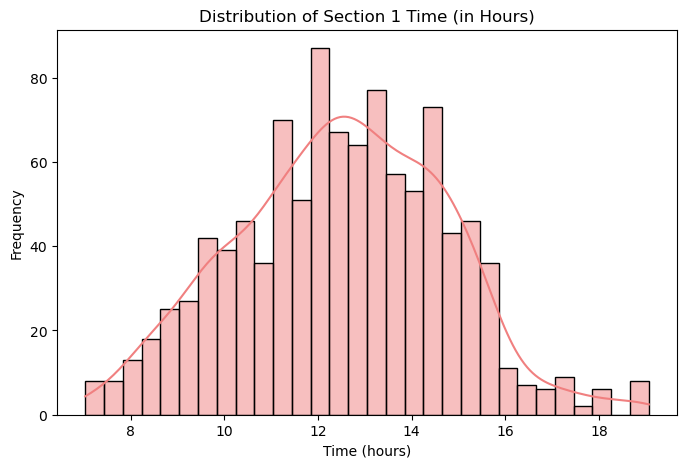

Processing column: Time Spent in Valgrisenche
9    0 days 00:00:37
22   0 days 00:00:52
6    0 days 00:00:41
18               NaT
13   0 days 00:06:38
Name: Time Spent in Valgrisenche, dtype: timedelta64[ns]


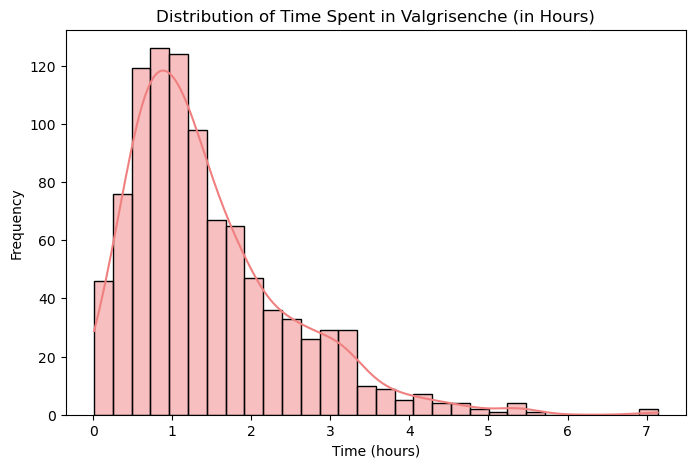

Processing column: Section 2 Time
9    0 days 09:39:02
22   0 days 09:39:39
6                NaT
18               NaT
13   0 days 10:45:38
Name: Section 2 Time, dtype: timedelta64[ns]


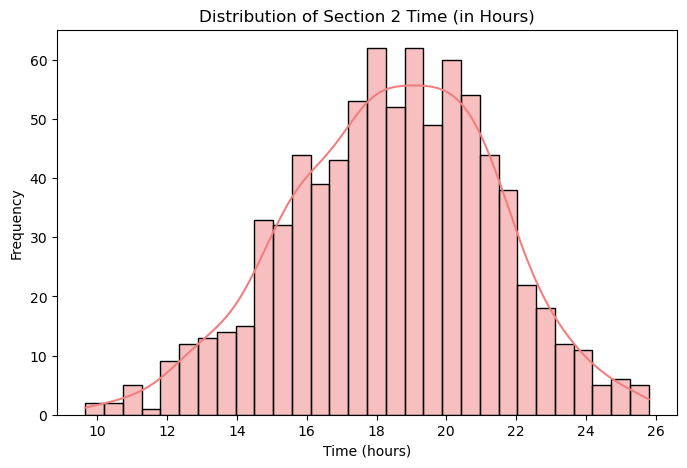

Processing column: Time Spent in Cogne
9    0 days 00:01:15
22   0 days 00:01:14
6                NaT
18   0 days 00:03:03
13   0 days 00:30:02
Name: Time Spent in Cogne, dtype: timedelta64[ns]


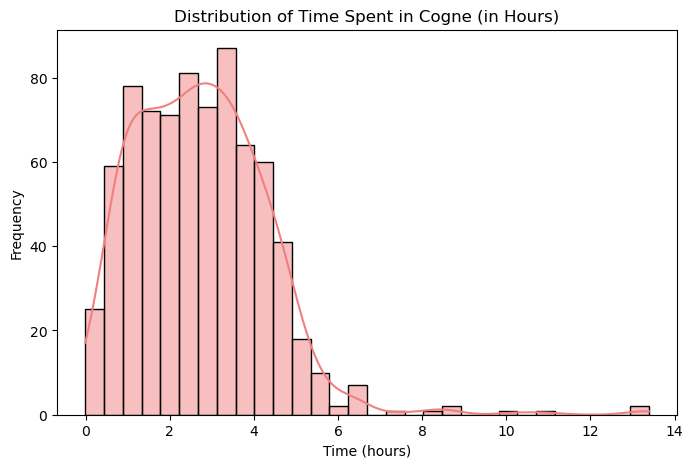

Processing column: Section 3 Time
9    0 days 07:50:20
22   0 days 07:27:00
6    0 days 07:15:47
18   0 days 07:57:59
13   0 days 07:47:42
Name: Section 3 Time, dtype: timedelta64[ns]


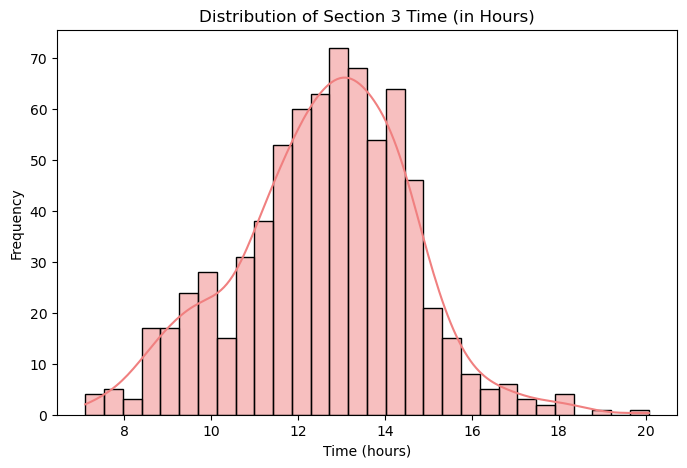

Processing column: Time Spent in Donnas
9    0 days 00:00:41
22   0 days 00:00:47
6    0 days 00:00:34
18   0 days 00:00:22
13   0 days 00:15:54
Name: Time Spent in Donnas, dtype: timedelta64[ns]


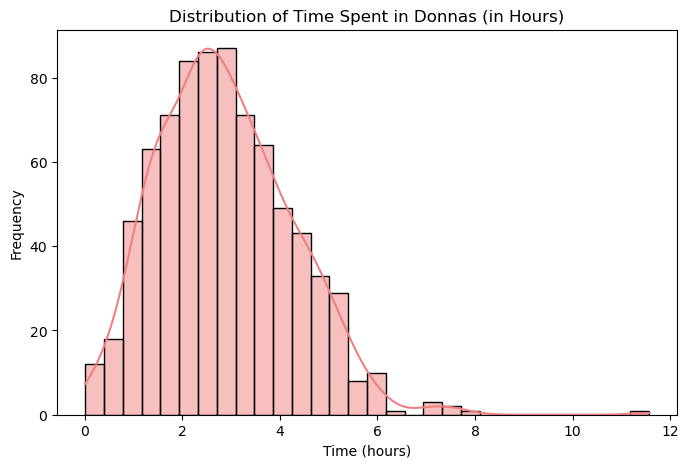

Processing column: Section 4 Time
9    0 days 12:38:48
22   0 days 18:17:42
6    0 days 15:05:50
18   0 days 14:33:03
13   0 days 15:08:54
Name: Section 4 Time, dtype: timedelta64[ns]


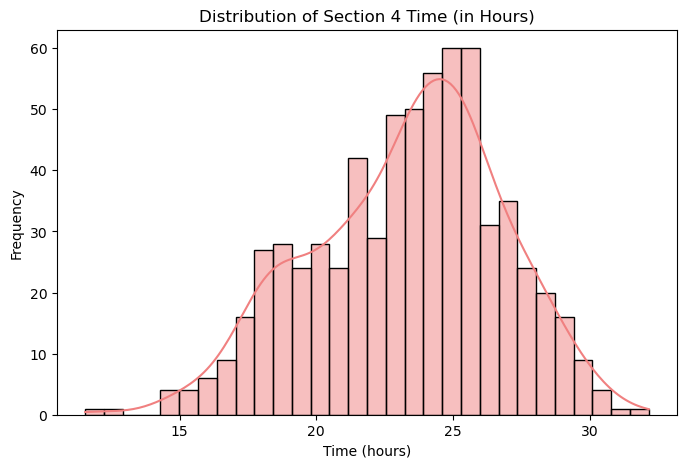

Processing column: Time Spent in Gressoney
9    0 days 01:52:28
22   0 days 00:08:20
6    0 days 05:21:12
18   0 days 00:10:58
13   0 days 00:15:04
Name: Time Spent in Gressoney, dtype: timedelta64[ns]


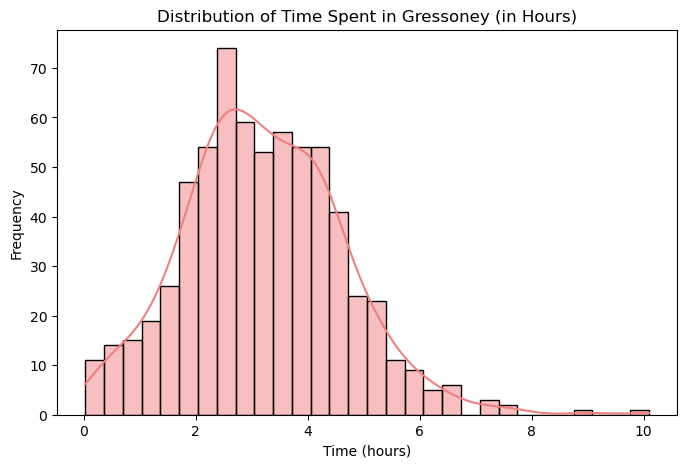

Processing column: Section 5 Time
9    0 days 07:36:52
22   0 days 06:34:18
6    0 days 06:51:17
18   0 days 08:28:19
13   0 days 07:29:44
Name: Section 5 Time, dtype: timedelta64[ns]


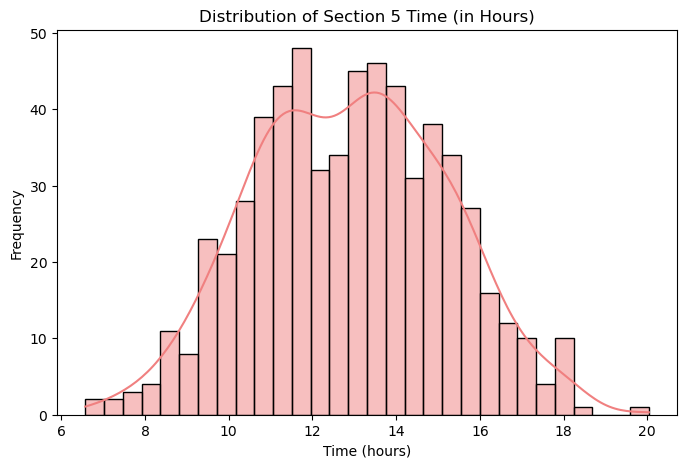

Processing column: Time Spent in Valtournenche
9    0 days 00:10:07
22   0 days 00:08:43
6    0 days 00:00:05
18   0 days 00:00:06
13   0 days 00:04:14
Name: Time Spent in Valtournenche, dtype: timedelta64[ns]


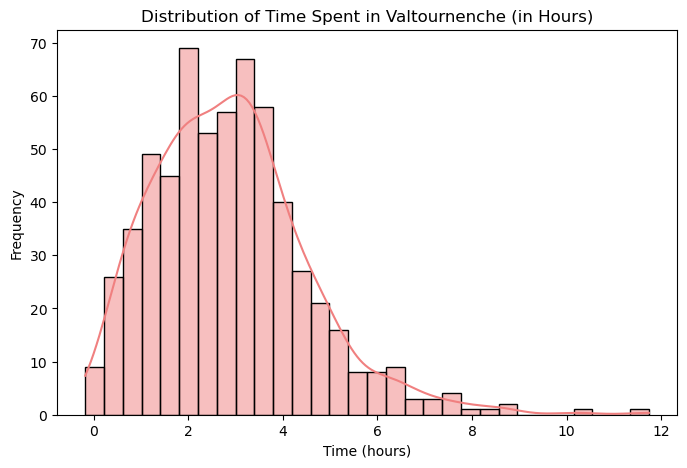

Processing column: Section 6 Time
9    0 days 11:20:03
22   0 days 11:40:28
6    0 days 11:50:13
18   0 days 14:59:56
13   0 days 14:34:16
Name: Section 6 Time, dtype: timedelta64[ns]


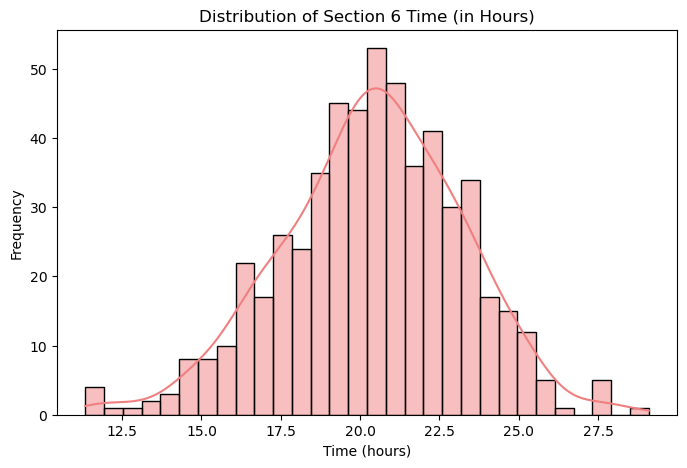

Processing column: Time Spent in Ollomont
9    0 days 00:18:18
22   0 days 00:18:16
6    0 days 00:08:35
18   0 days 00:08:47
13   0 days 00:25:23
Name: Time Spent in Ollomont, dtype: timedelta64[ns]


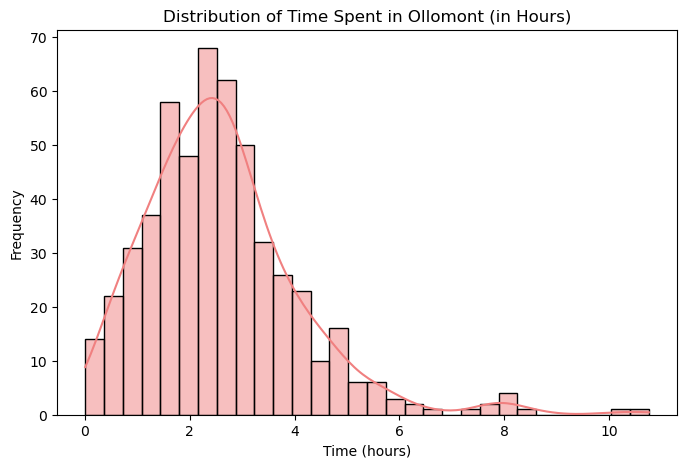

Processing column: Section 7 Time
9    0 days 10:35:25
22   0 days 11:49:19
6    0 days 11:33:14
18   0 days 11:51:25
13   0 days 12:19:46
Name: Section 7 Time, dtype: timedelta64[ns]


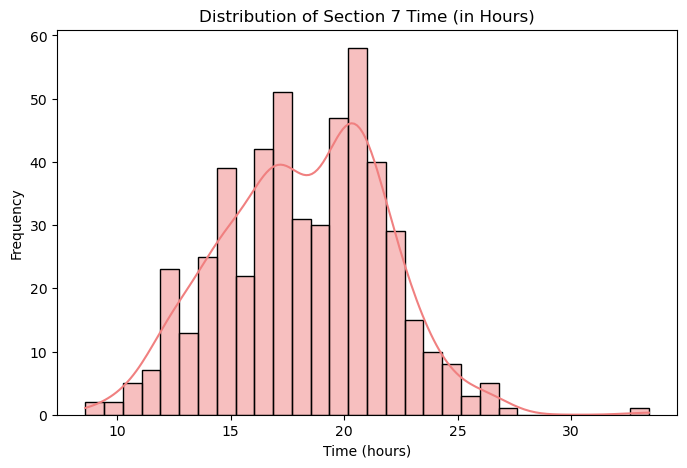

Processing column: Duration
9    2 days 21:08:32
22   3 days 01:10:18
6    3 days 03:35:59
18   3 days 04:43:09
13   3 days 04:49:20
Name: Duration, dtype: timedelta64[ns]


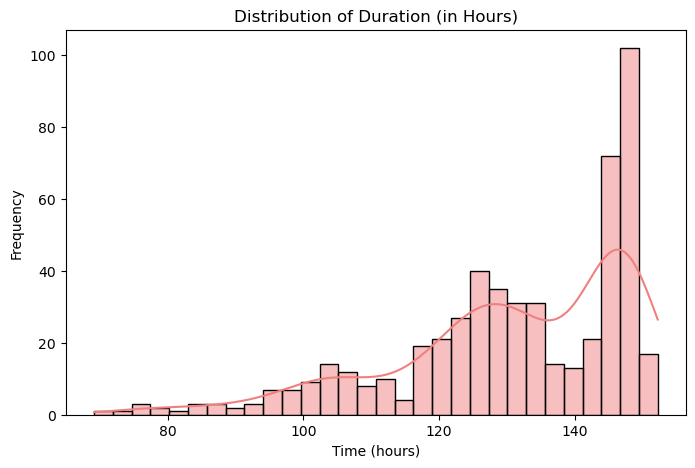

In [166]:
# Define the columns to process
time_columns = ['Section 1 Time', 'Time Spent in Valgrisenche', 
                'Section 2 Time', 'Time Spent in Cogne',
                'Section 3 Time', 'Time Spent in Donnas',
                'Section 4 Time', 'Time Spent in Gressoney',
                'Section 5 Time', 'Time Spent in Valtournenche',
                'Section 6 Time', 'Time Spent in Ollomont',
                'Section 7 Time', 'Duration']

# Loop through the columns
for column in time_columns:
    print(f"Processing column: {column}")
    print(tableau_pivoted_TOR330_dates[column].head())
    
    
    # Convert to timedelta and get total hours (handling NaT)
    tableau_pivoted_TOR330_dates[f'{column}_hours'] = pd.to_timedelta(
        tableau_pivoted_TOR330_dates[f'{column}'], errors='coerce'
    ).dt.total_seconds() / 3600  # Convert seconds to hours

    # Drop NaN values for histogram visualization
    data_to_plot = tableau_pivoted_TOR330_dates[f'{column}_hours'].dropna()

    # Plot the histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(data_to_plot, kde=True, bins=30, color="lightcoral")
    plt.ticklabel_format(style='plain', axis='x')
    plt.title(f"Distribution of {column} (in Hours)")
    plt.xlabel("Time (hours)")
    plt.ylabel("Frequency")
    plt.show()


In [171]:
for column in ['Section 1 Time', 'Time Spent in Valgrisenche', 
                'Section 2 Time', 'Time Spent in Cogne',
                'Section 3 Time', 'Time Spent in Donnas',
                'Section 4 Time', 'Time Spent in Gressoney',
                'Section 5 Time', 'Time Spent in Valtournenche',
                'Section 6 Time', 'Time Spent in Ollomont',
                'Section 7 Time', 'Duration']:
    print(tableau_pivoted_TOR330_dates[column].head())

    
    # Convert to timedelta while handling NaT
    tableau_pivoted_TOR330_dates[f'{column}_in_seconds'] = (
        pd.to_timedelta(tableau_pivoted_TOR330_dates[column], errors='coerce')
        .dt.total_seconds()
    )
    
    # Mark missing values explicitly for Tableau
    tableau_pivoted_TOR330_dates[f'{column}_in_seconds'] = (
        tableau_pivoted_TOR330_dates[f'{column}_in_seconds']
        .fillna('Missing')  # Replace NaT with 'Missing'
    )
            
    print(f'{column}_in_seconds')
    print('*'*20)   


9    0 days 07:04:36
22   0 days 07:03:40
6    0 days 07:20:07
18   0 days 07:27:10
13   0 days 07:06:05
Name: Section 1 Time, dtype: timedelta64[ns]
Section 1 Time_in_seconds
********************
9    0 days 00:00:37
22   0 days 00:00:52
6    0 days 00:00:41
18               NaT
13   0 days 00:06:38
Name: Time Spent in Valgrisenche, dtype: timedelta64[ns]
Time Spent in Valgrisenche_in_seconds
********************
9    0 days 09:39:02
22   0 days 09:39:39
6                NaT
18               NaT
13   0 days 10:45:38
Name: Section 2 Time, dtype: timedelta64[ns]
Section 2 Time_in_seconds
********************
9    0 days 00:01:15
22   0 days 00:01:14
6                NaT
18   0 days 00:03:03
13   0 days 00:30:02
Name: Time Spent in Cogne, dtype: timedelta64[ns]
Time Spent in Cogne_in_seconds
********************
9    0 days 07:50:20
22   0 days 07:27:00
6    0 days 07:15:47
18   0 days 07:57:59
13   0 days 07:47:42
Name: Section 3 Time, dtype: timedelta64[ns]
Section 3 Time_in_seconds
**

In [168]:
tableau_pivoted_TOR330_dates.columns

Index(['Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Status1', 'Wave', 'Retired', 'Retired_Section',
       'new_Start Date', 'Section 1 Time', 'Time Spent in Valgrisenche',
       'Section 2 Time', 'Time Spent in Cogne', 'Section 3 Time',
       'Time Spent in Donnas', 'Section 4 Time', 'Time Spent in Gressoney',
       'Section 5 Time', 'Time Spent in Valtournenche', 'Section 6 Time',
       'Time Spent in Ollomont', 'Section 7 Time', 'Duration',
       'Section 1 Time_hours', 'Time Spent in Valgrisenche_hours',
       'Section 2 Time_hours', 'Time Spent in Cogne_hours',
       'Section 3 Time_hours', 'Time Spent in Donnas_hours',
       'Section 4 Time_hours', 'Time Spent in Gressoney_hours',
       'Section 5 Time_hours', 'Time Spent in Valtournenche_hours',
       'Section 6 Time_hours', 'Time Spent in Ollomont_hours',
       'Section 7 Time_hours', 'Duration_hours', 'Section 1 Time_in_seconds',
       'Time Spent in Valgrisenche_in_seconds', '

In [172]:
tableau_pivoted_TOR330_dates = tableau_pivoted_TOR330_dates[[
    
    'Name', 'Bib', 'Sex', 'Nationality', 'Year', 'Race', 'Category',
       'Status', 'Status1', 'Wave', 'Retired', 'Retired_Section',
       'new_Start Date', 'Section 1 Time_in_seconds',
       'Time Spent in Valgrisenche_in_seconds', 'Section 2 Time_in_seconds',
       'Time Spent in Cogne_in_seconds', 'Section 3 Time_in_seconds',
       'Time Spent in Donnas_in_seconds', 'Section 4 Time_in_seconds',
       'Time Spent in Gressoney_in_seconds', 'Section 5 Time_in_seconds',
       'Time Spent in Valtournenche_in_seconds', 'Section 6 Time_in_seconds',
       'Time Spent in Ollomont_in_seconds', 'Section 7 Time_in_seconds',  'Duration_in_seconds'
]]

### Saving for Tableau

In [173]:
tableau_pivoted_TOR330_dates.to_excel(f'{race} Data/tableau_{race}_aid_stations_{year}.xlsx' )